In [1]:
import numpy as np
import pandas as pd
import itertools as it
import heapq as hq
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("C:/Users/Tobias Giesgen/PycharmProjects/gempy")
sys.path.append("../")
import bayseg
import gempy as gp

In [2]:
data_s3 = pd.read_csv("../data/GemPy_models/Synthetic_well_data/gempy_model_4layers_horizontal_s5_5.csv")

#### BaySeg Analysis

In [3]:
# define measurement names 
feature_names = ['feature1','feature2','feature3','feature4']

# define borehole names
boreholes = []
for i in range(10):
    boreholes.append('BH%s'%str(i+1))

In [4]:
feature_vectors_norm = bayseg.normalize_feature_vectors(data_s3.loc[:,feature_names])

In [5]:
# n, nft = bayseg.test_bic(feature_vectors_norm, 15)

In [37]:
clf = bayseg.BaySeg(feature_vectors_norm, 4, data_s3 , feature_names, boreholes, 
                    gp_resolution = 51, plot = '2dy', inc_gempy=False, beta_init=0.6, 
                    stencil = '8p')

In [38]:
%matplotlib notebook

clf.fit(300, # number of iterations
        beta_jump_length=0.02, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False, plot= "2dy", fix_beta=False)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:31<00:00,  1.97it/s]


In [39]:
labels_without_gempy = clf.labels.copy()

In [40]:
probability_without_gempy = clf.labels_probability.copy()

In [41]:
clf = bayseg.BaySeg(feature_vectors_norm, 4, data_s3 , feature_names, boreholes, 
                    gp_resolution = 51, plot = '2dy', inc_gempy=False, beta_init=0.6, 
                    stencil = '8p')

In [42]:
%matplotlib notebook

clf.fit(300, # number of iterations
        beta_jump_length=0.02, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False, plot= "2dy", fix_beta=False)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:34<00:00,  1.94it/s]


In [43]:
labels_without_gempy2 = clf.labels.copy()

In [44]:
probability_without_gempy2 = clf.labels_probability.copy()

In [14]:
def information_entropy(prob, data):
    inf_entropy = np.round( - np.sum(prob * np.log2(prob), axis=1),3)
    
    borehole_loc = []
    imshow = []
    for i in range(len(set(data.loc[:,'Well Name']))):
        borehole_loc.append(np.where(data == 'BH%s'%(i+1))[0])
        for j in range(10):    
            imshow.append(inf_entropy[borehole_loc[i]])
        imshow.append(np.zeros_like(borehole_loc[i]))
        
    return np.transpose(imshow)

In [140]:
imshow = information_entropy(probability_without_gempy2[150], data_s3)

In [141]:
imshow2 = information_entropy(probability_with_gempy2[150], data_s3)

Text(0.5,0,'Borehole number [/]')

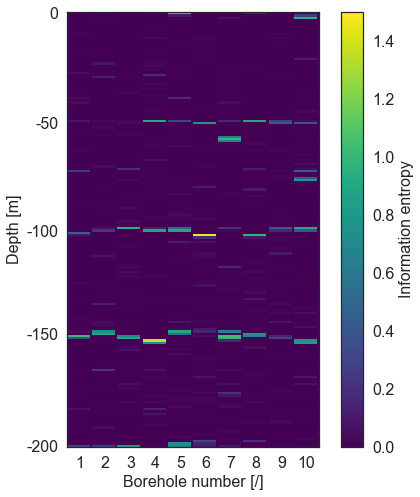

In [142]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

fig = plt.figure(figsize=(8,8))
plt.imshow(imshow, cmap='viridis')
plt.grid(False)
plt.clim(0,1.5)
cbar = plt.colorbar()
cbar.set_label('Information entropy', fontsize = 16)
#plt.title('Information entropy')
ytick = [0,-50,-100,-150,-200]
ytick_loc = [0,48,95,140,189]
plt.yticks(ytick_loc, ytick)
plt.ylabel('Depth [m]', fontsize = 16)
xtick = [1,2,3,4,5,6,7,8,9,10]
xtick_loc = [5,16,27,38,49,60,71,82,93,104]
plt.xticks(xtick_loc, xtick)
plt.xlabel('Borehole number [/]', fontsize = 16)

#plt.axis([0,109,0,190])

Text(0.5,0,'Borehole number [/]')

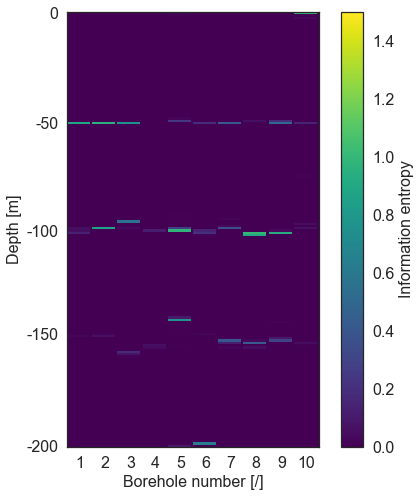

In [143]:
%matplotlib inline
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

fig = plt.figure(figsize=(8,8))
plt.imshow(imshow2, cmap='viridis')
plt.grid(False)
plt.clim(0,1.5)
cbar = plt.colorbar()
cbar.set_label('Information entropy', fontsize = 16)
#plt.title('Information entropy')
ytick = [0,-50,-100,-150,-200]
ytick_loc = [0,48,95,140,189]
plt.yticks(ytick_loc, ytick)
plt.ylabel('Depth [m]', fontsize = 16)
xtick = [1,2,3,4,5,6,7,8,9,10]
xtick_loc = [5,16,27,38,49,60,71,82,93,104]
plt.xticks(xtick_loc, xtick)
plt.xlabel('Borehole number [/]', fontsize = 16)

Text(0.5,1,'Information entropy')

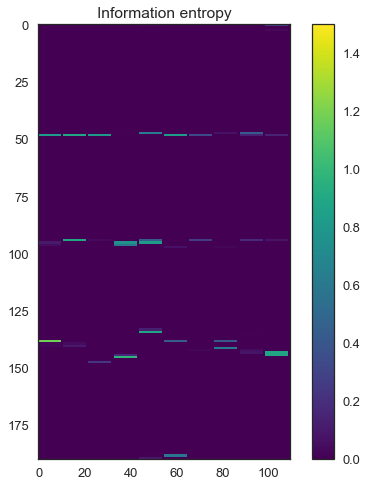

In [62]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(imshow, cmap='viridis')
plt.grid(False)
plt.clim(0,1.5)
plt.colorbar()
plt.title('Information entropy')

C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


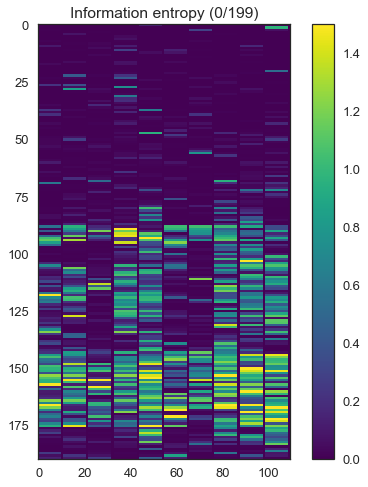

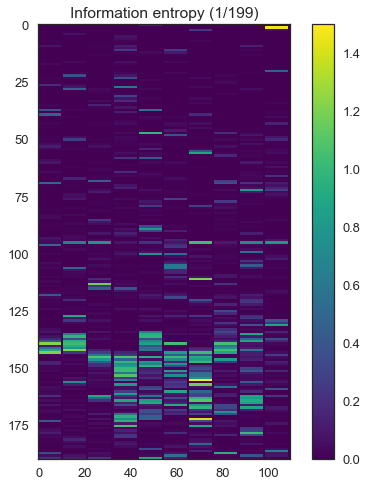

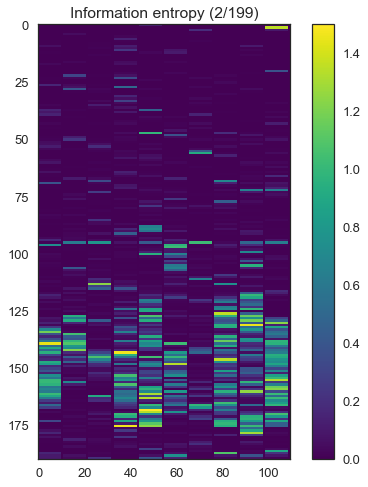

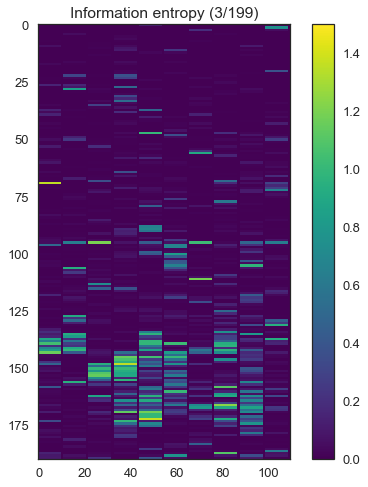

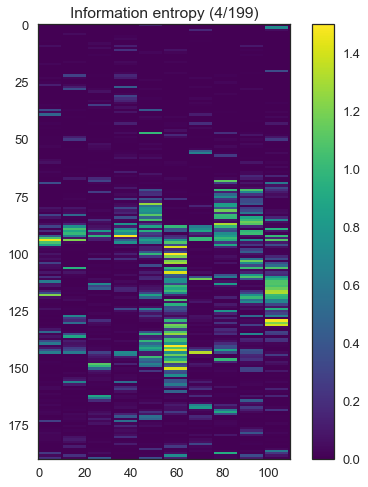

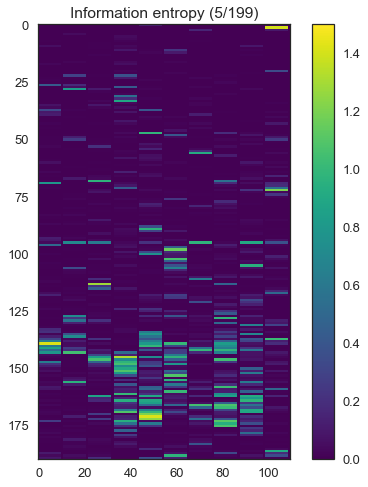

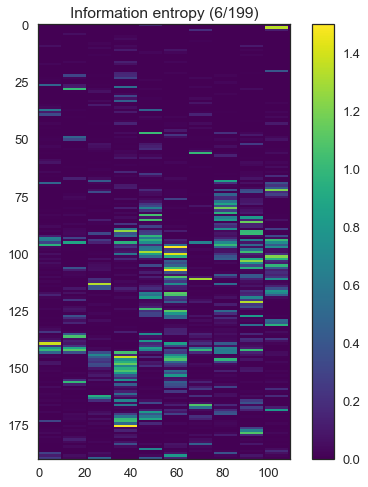

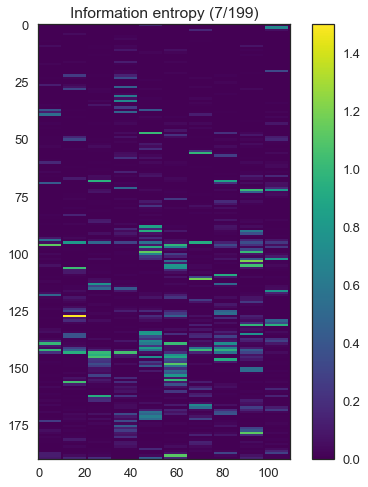

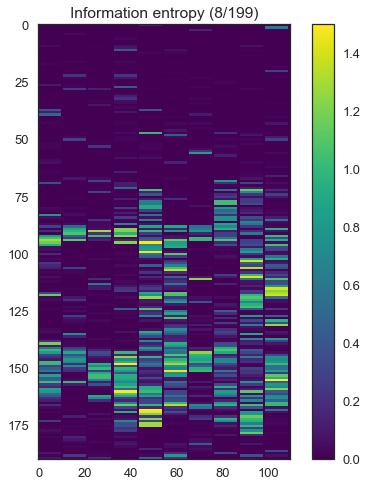

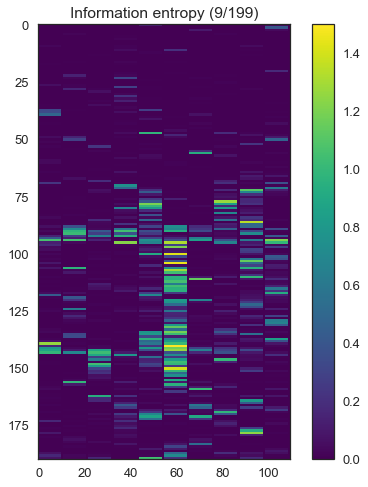

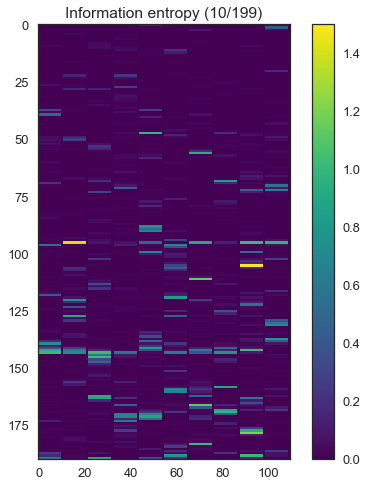

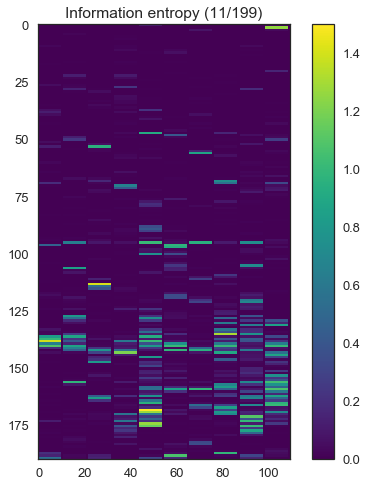

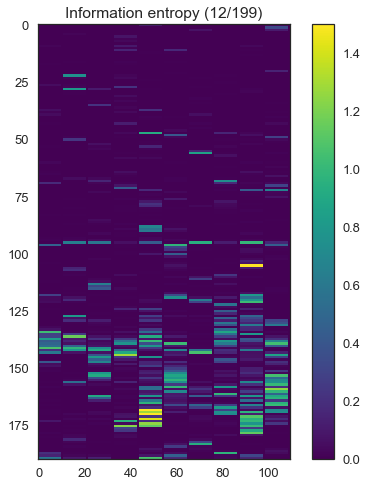

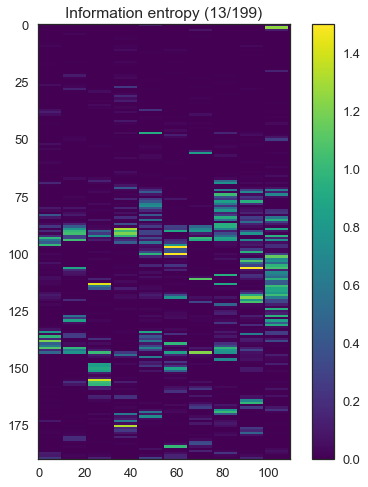

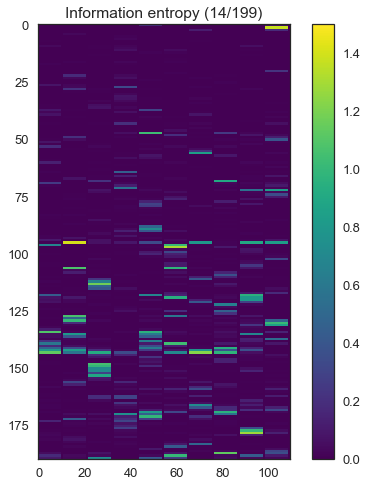

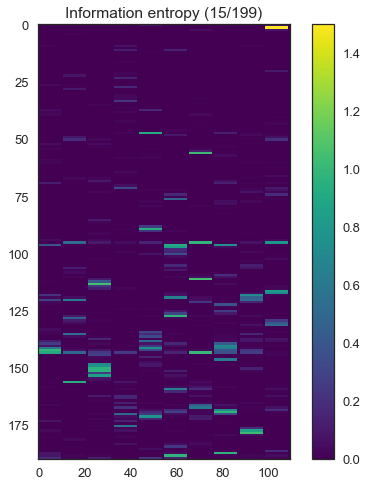

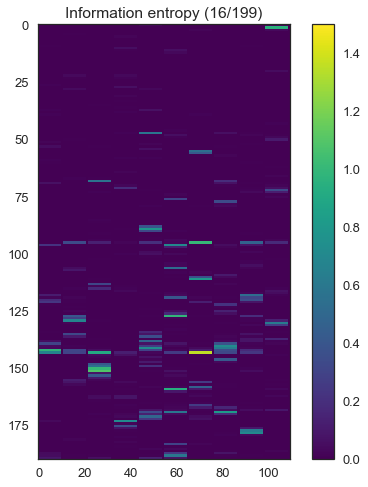

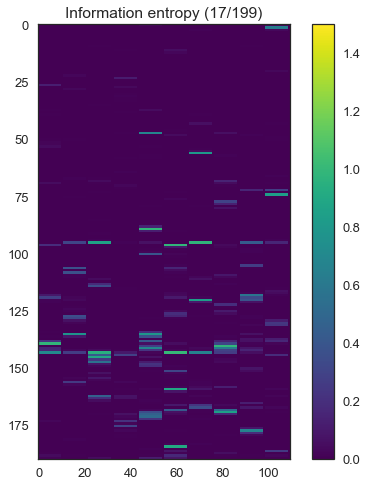

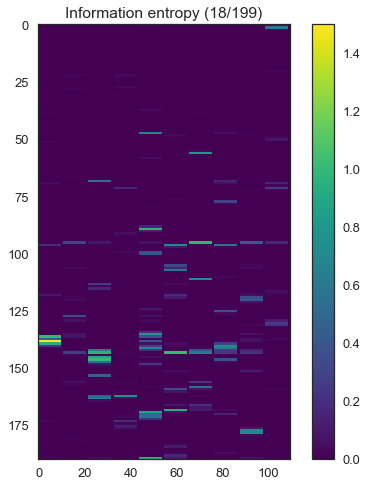

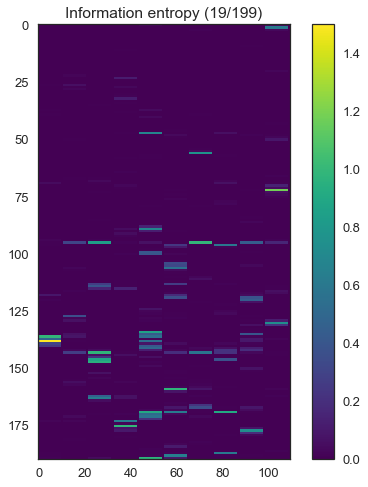

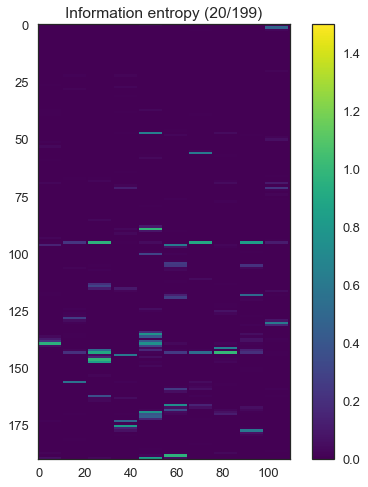

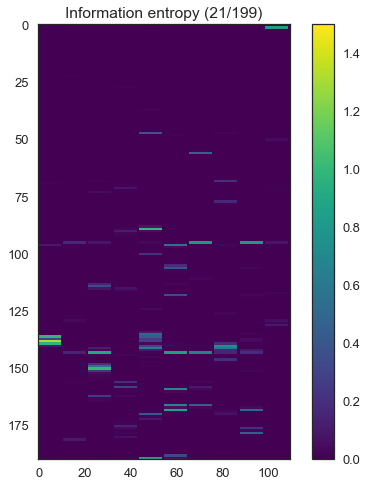

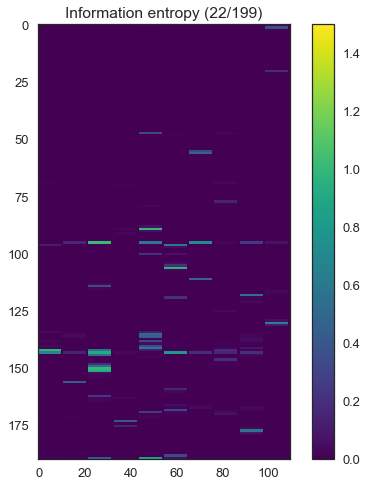

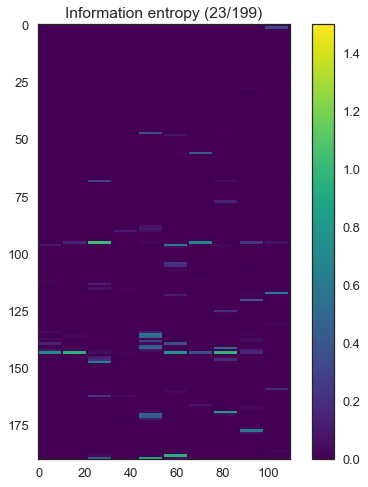

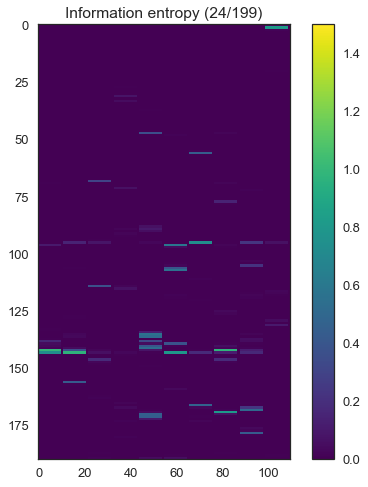

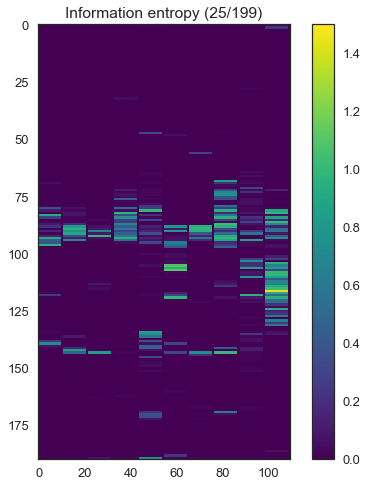

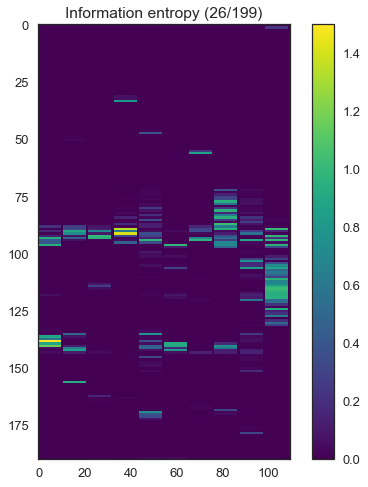

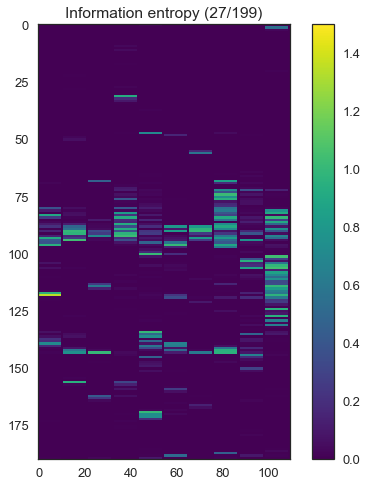

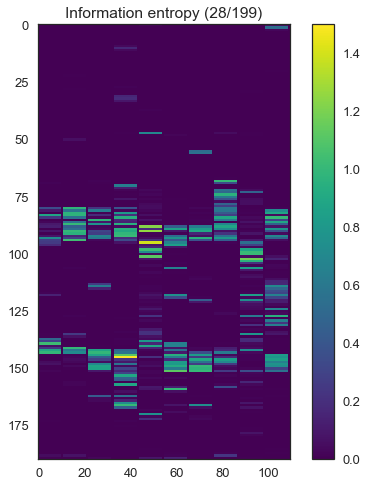

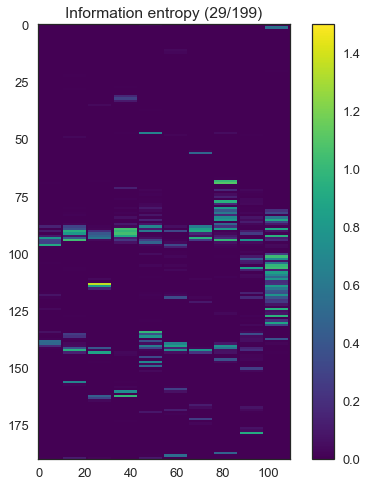

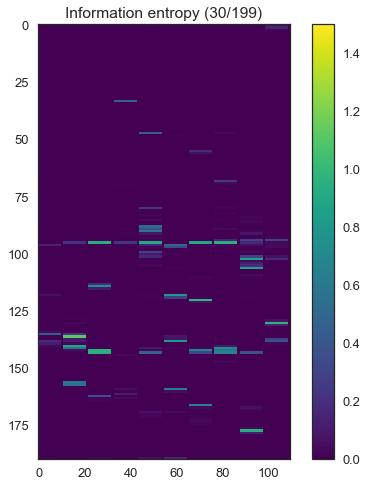

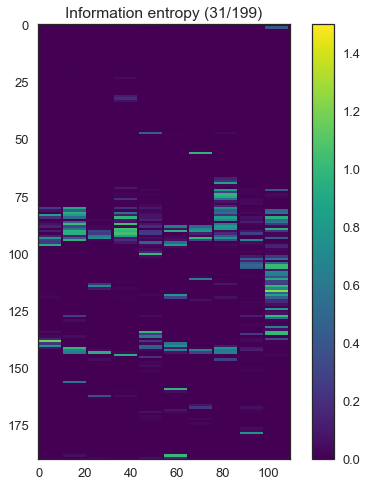

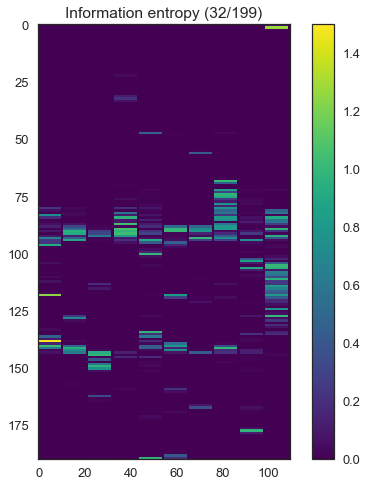

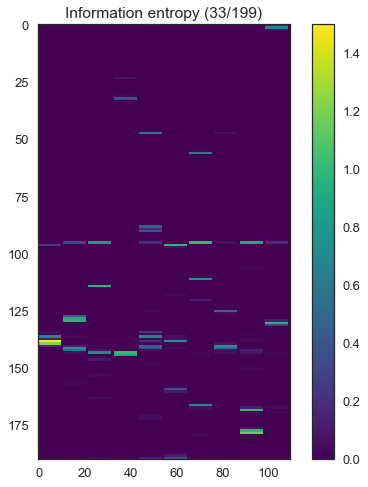

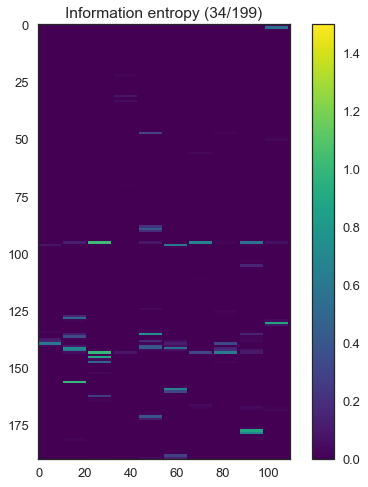

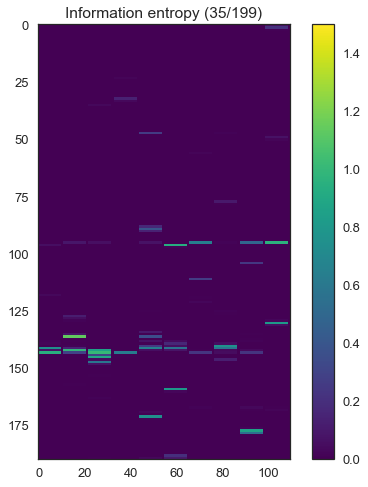

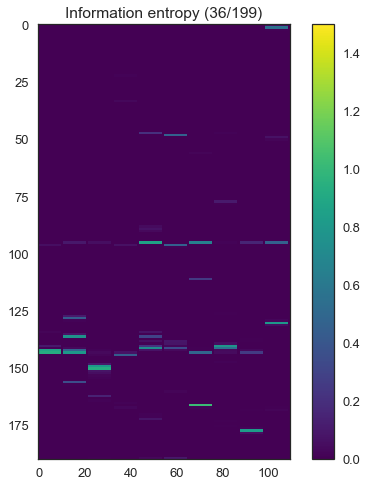

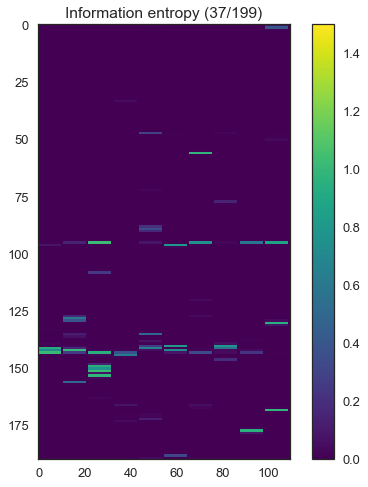

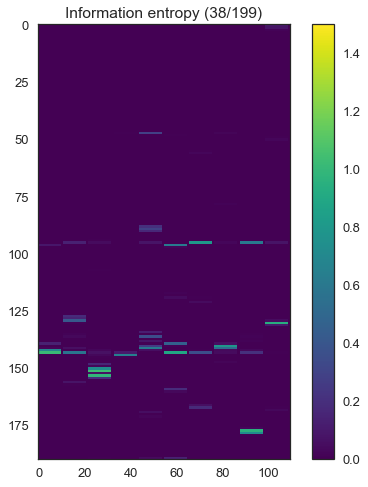

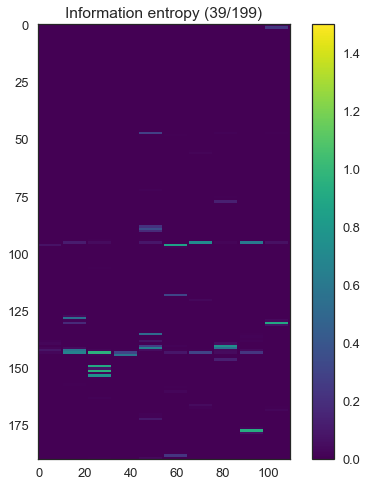

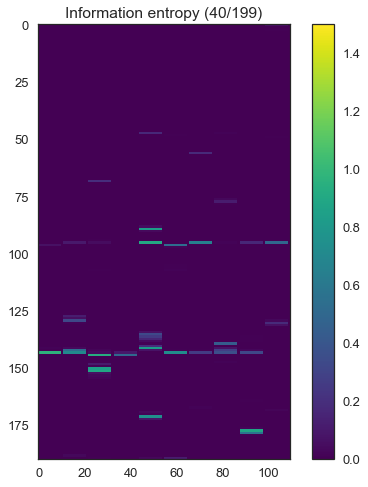

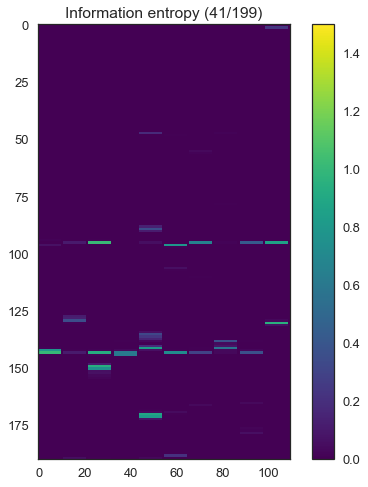

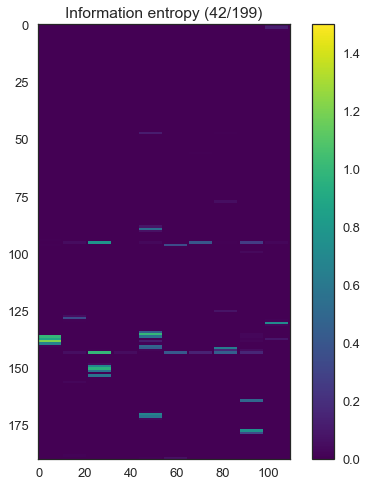

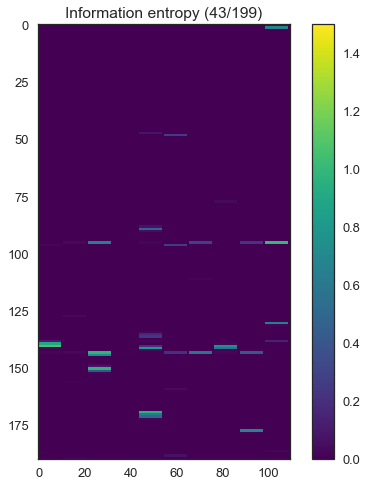

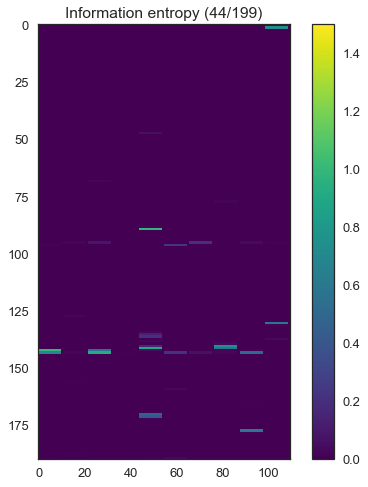

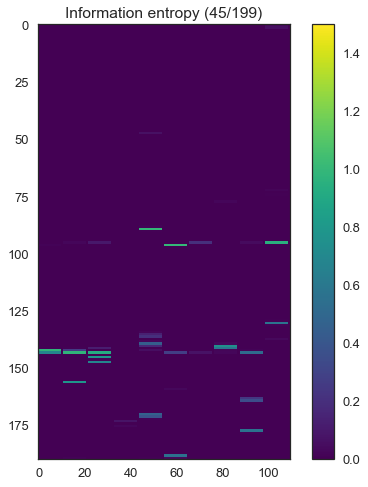

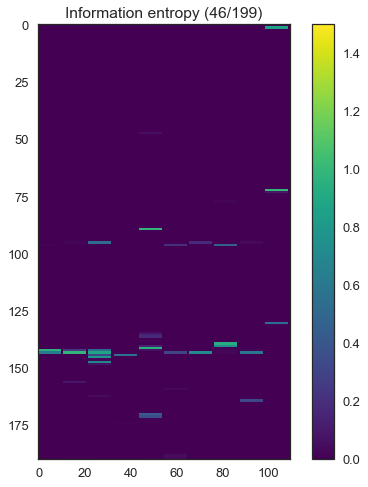

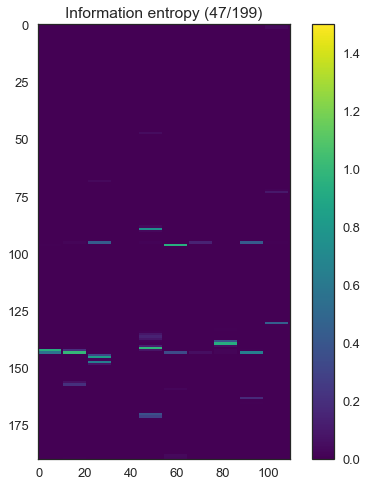

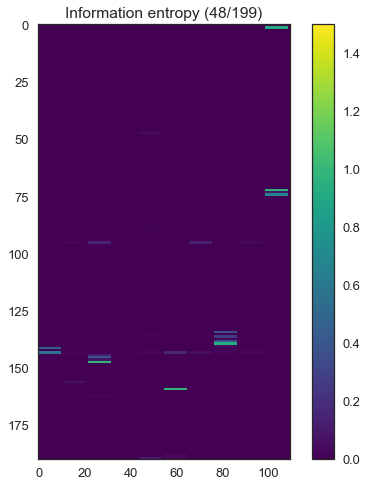

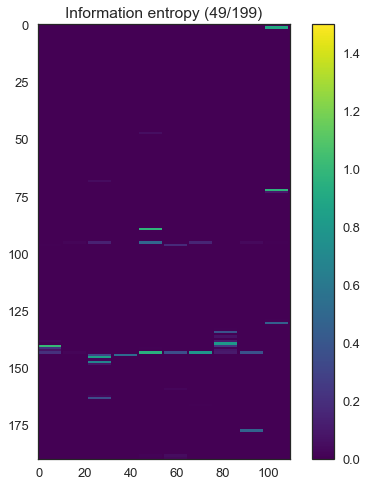

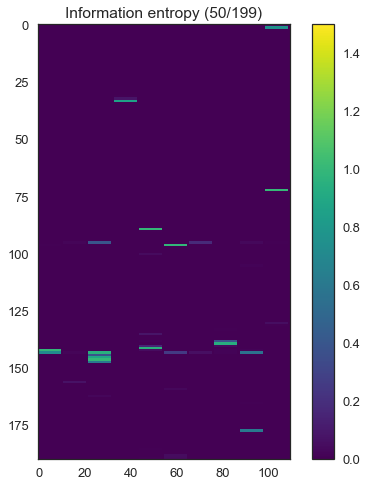

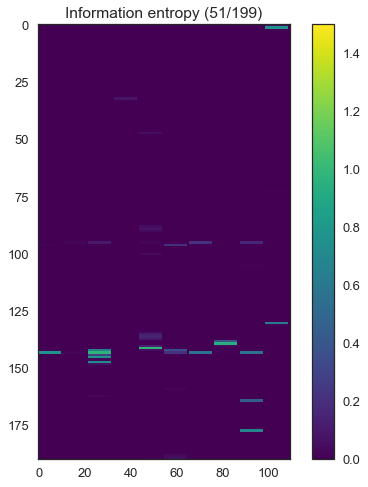

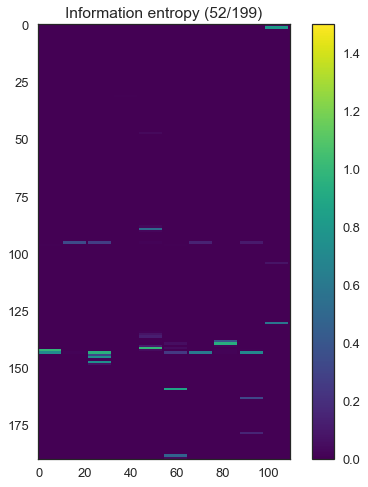

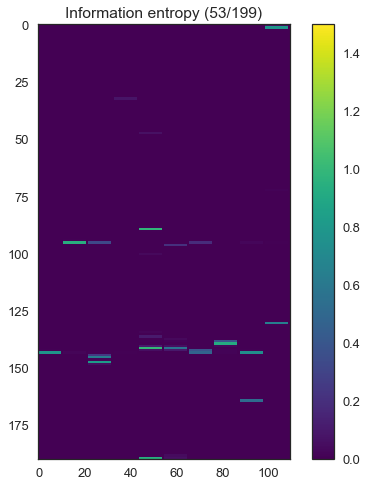

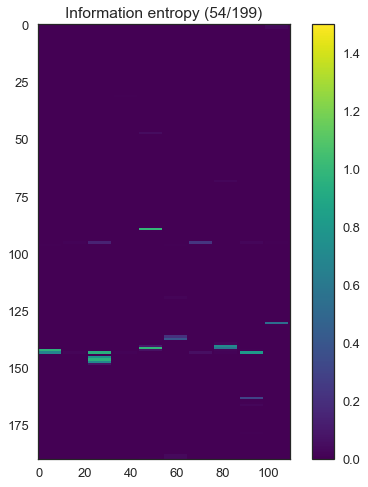

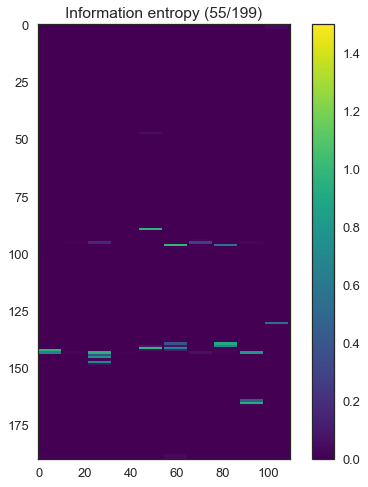

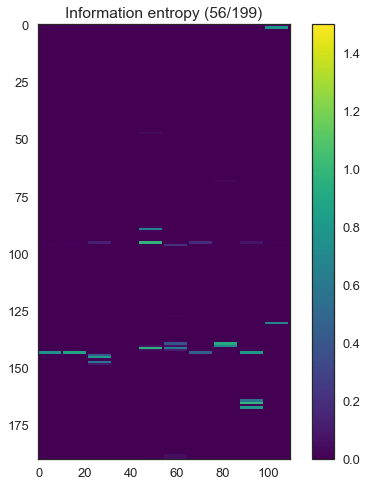

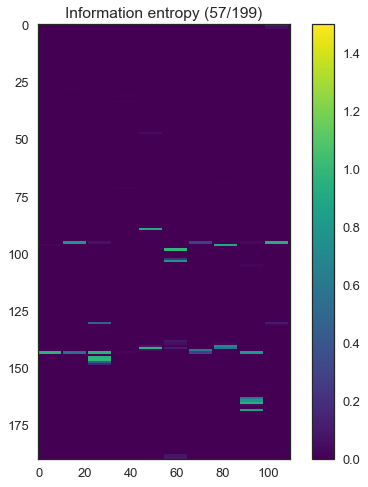

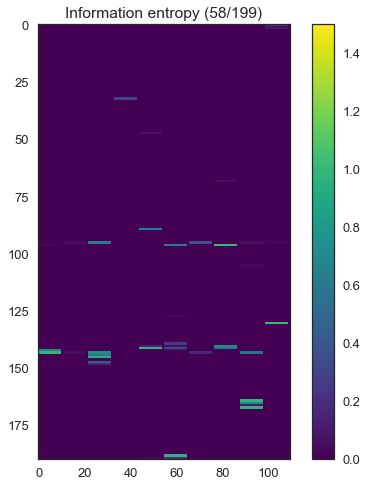

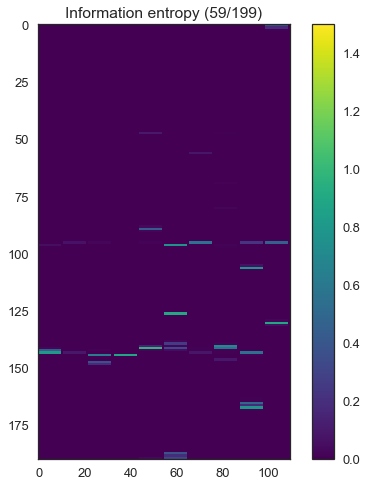

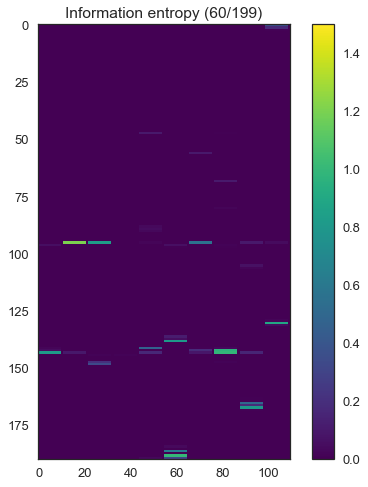

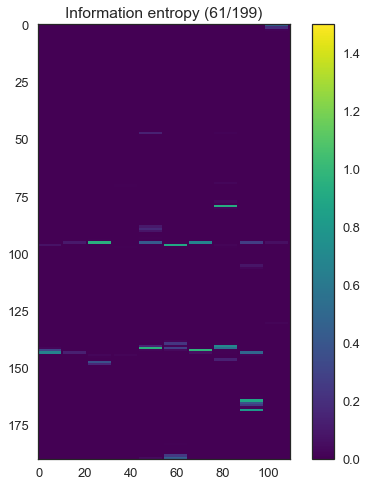

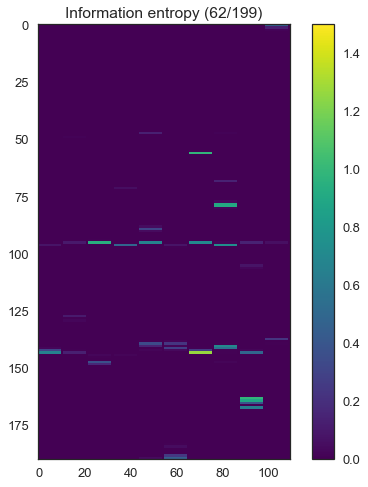

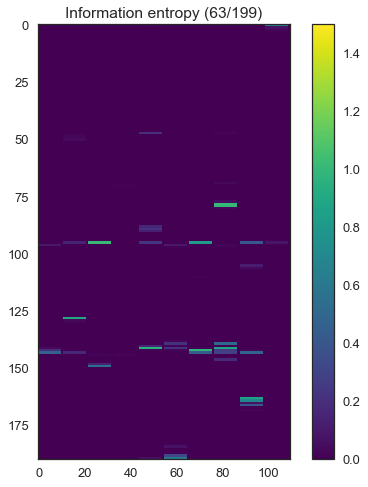

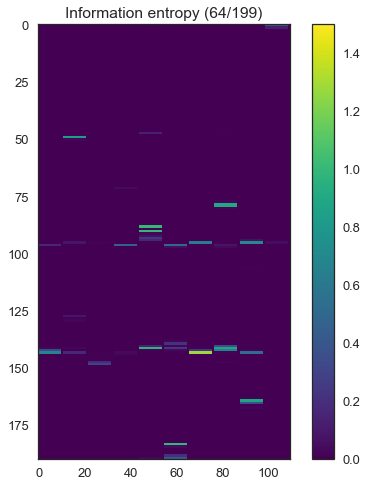

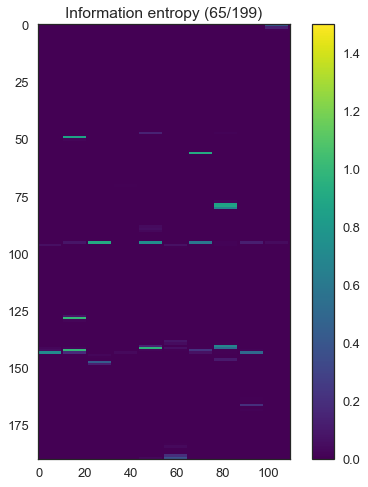

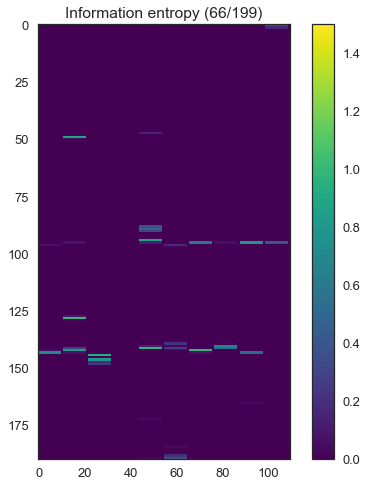

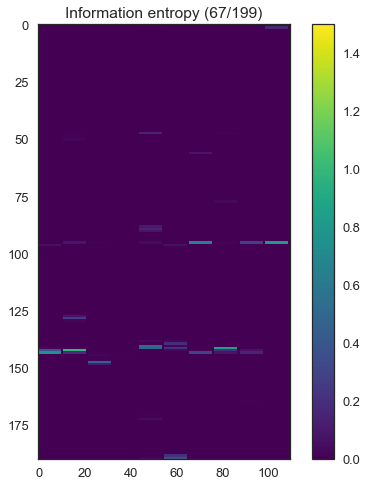

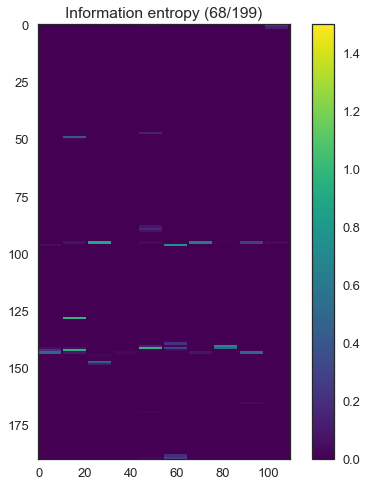

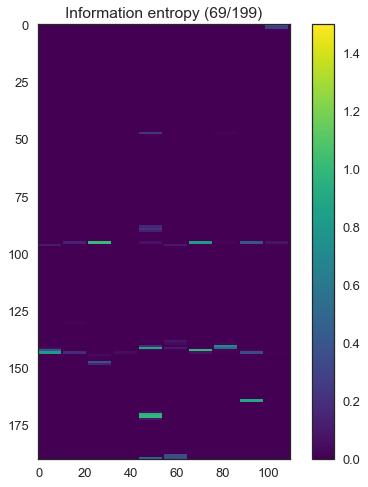

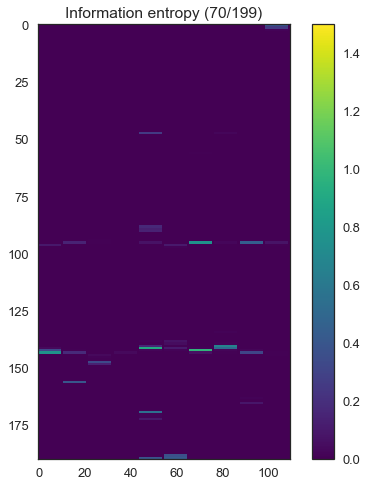

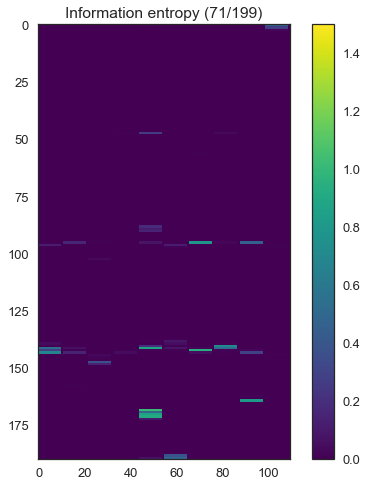

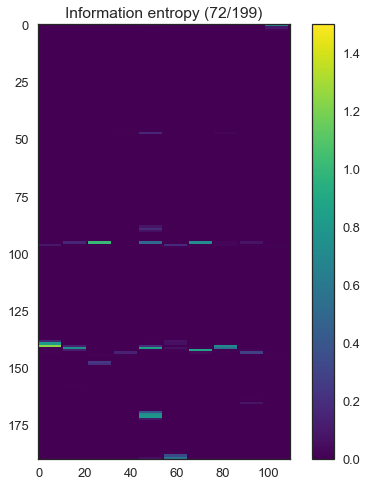

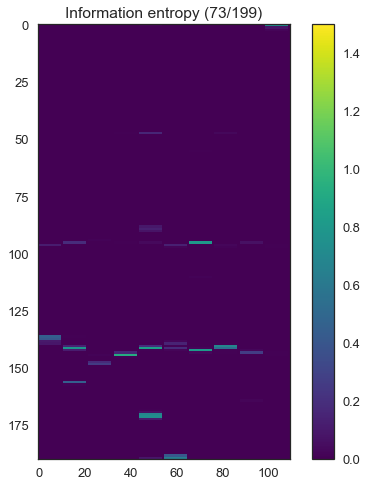

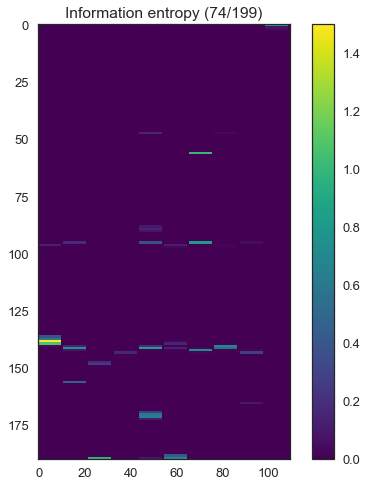

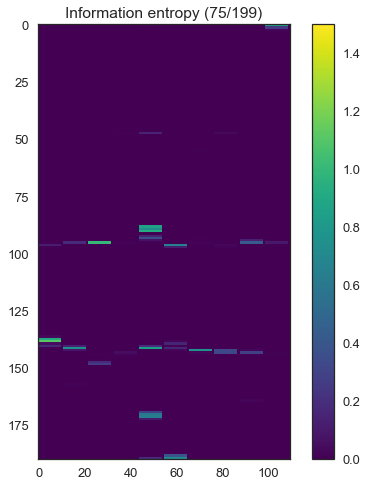

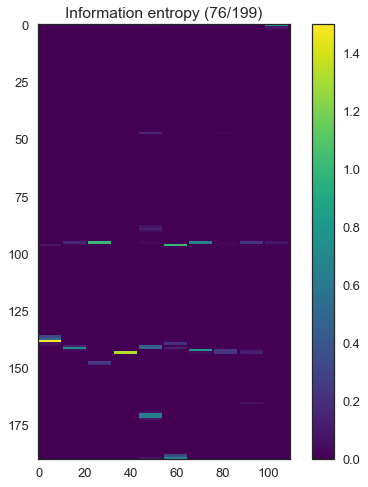

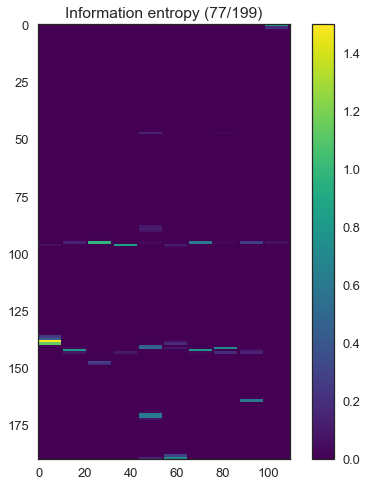

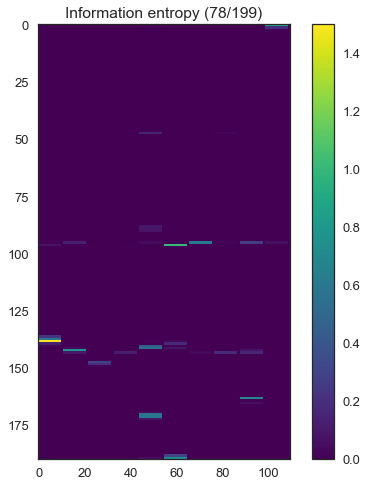

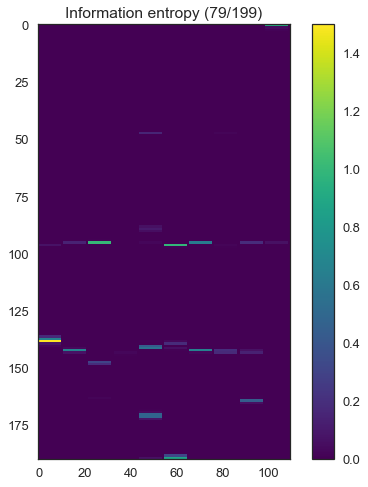

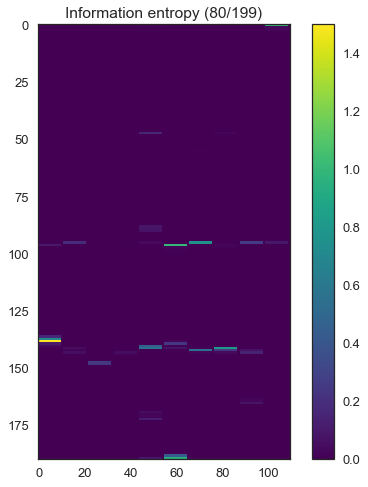

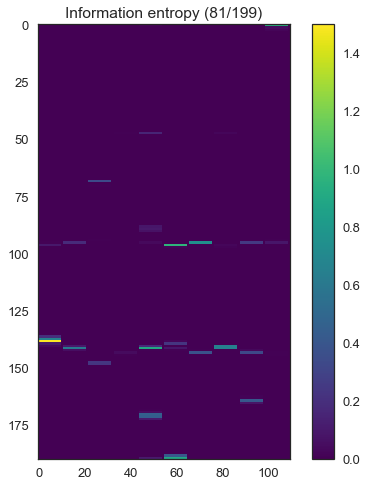

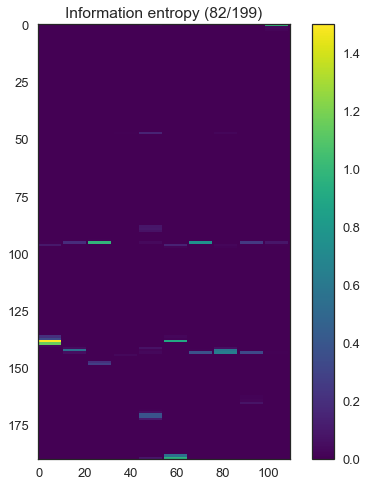

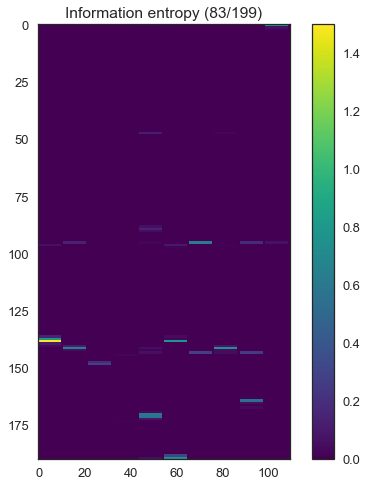

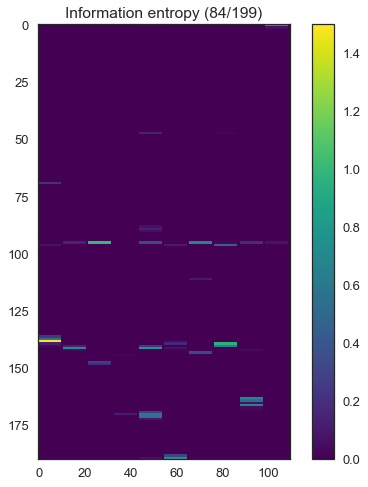

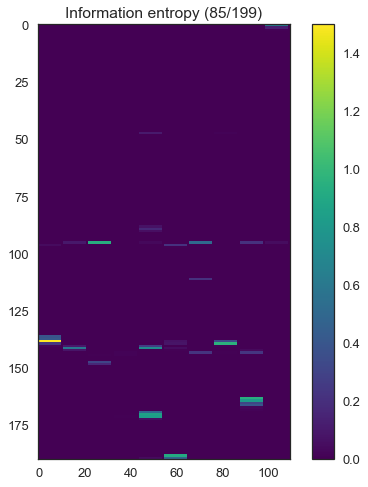

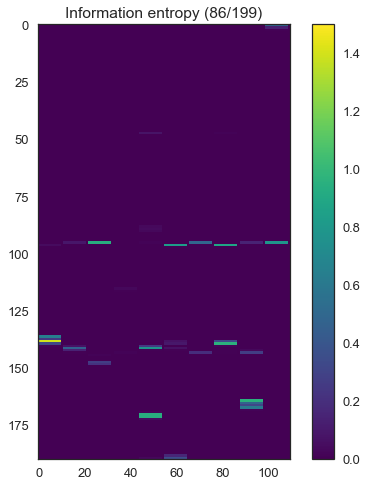

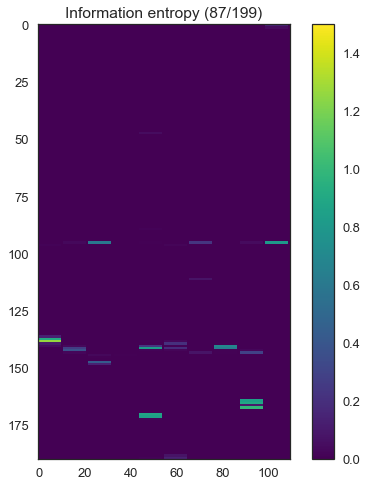

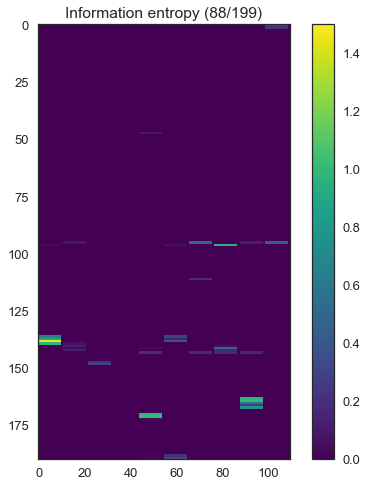

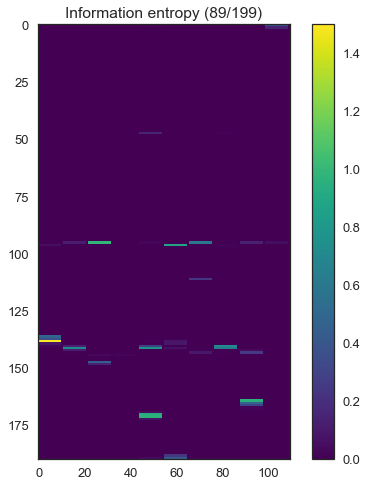

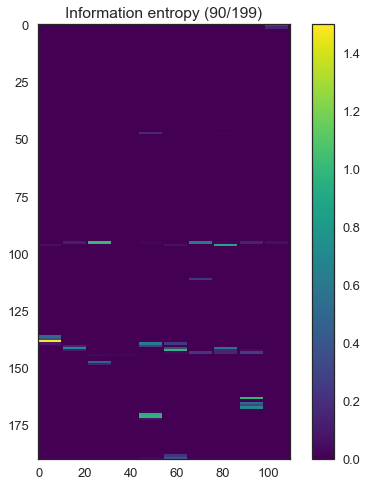

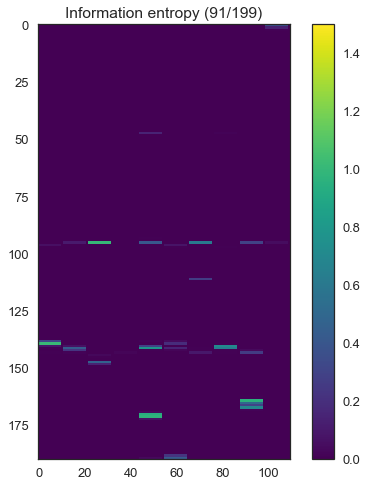

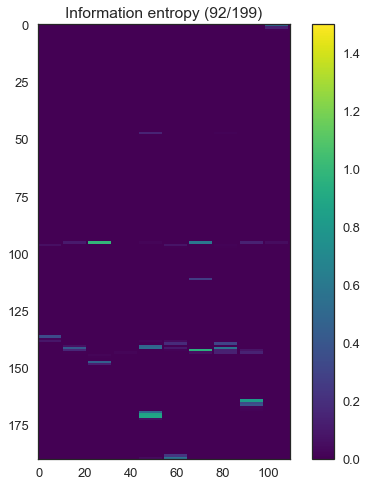

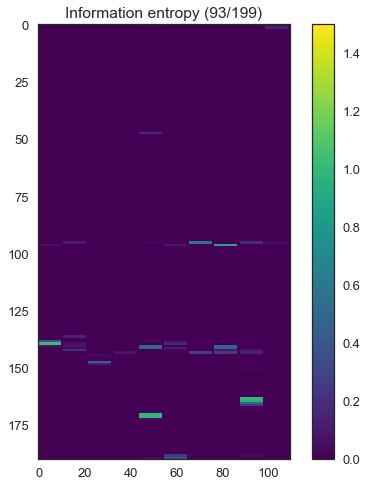

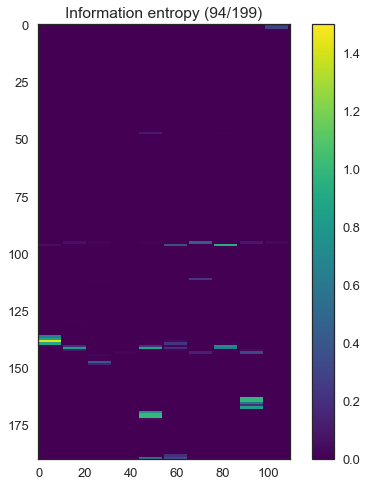

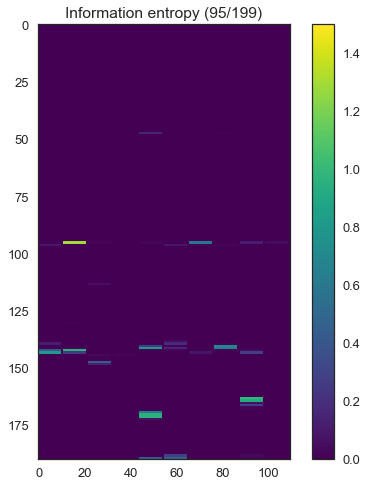

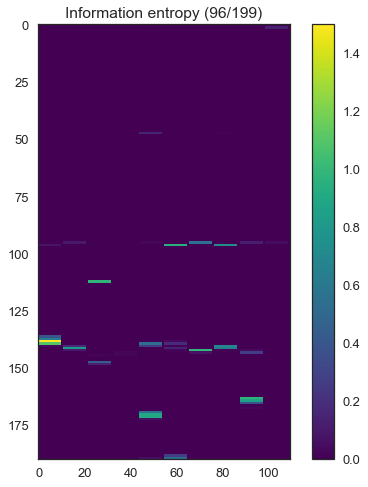

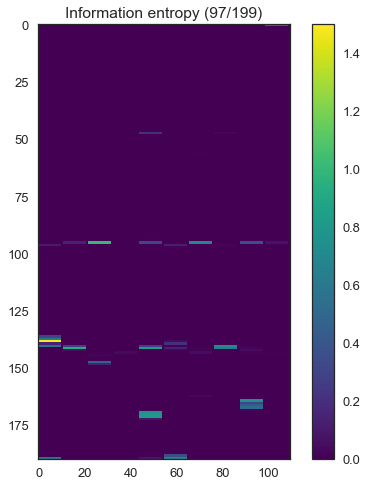

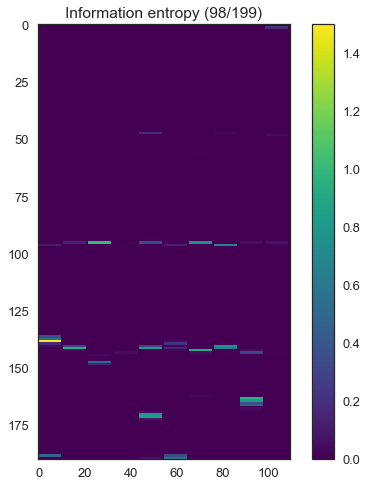

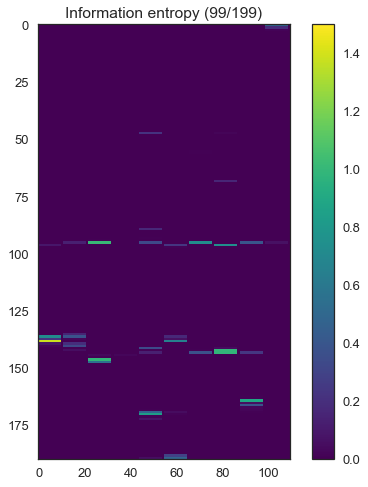

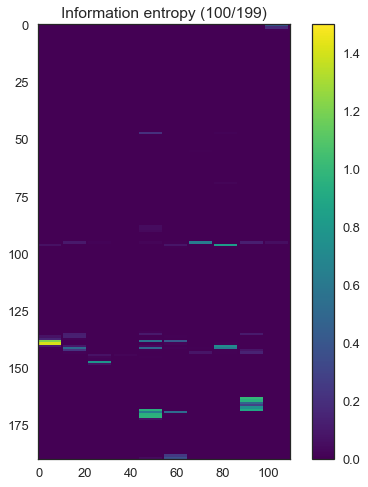

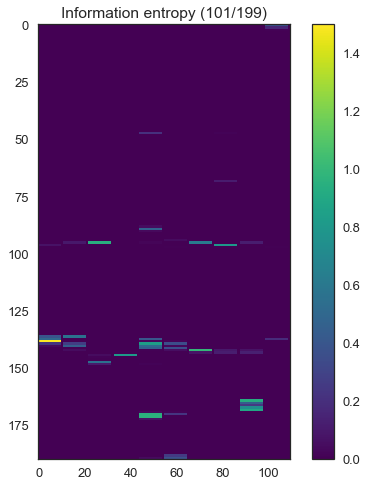

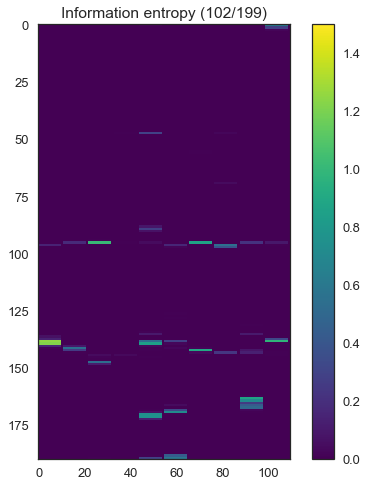

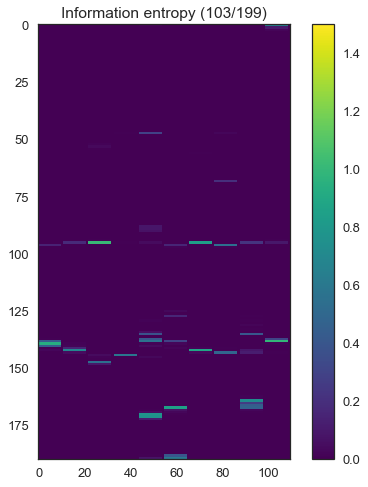

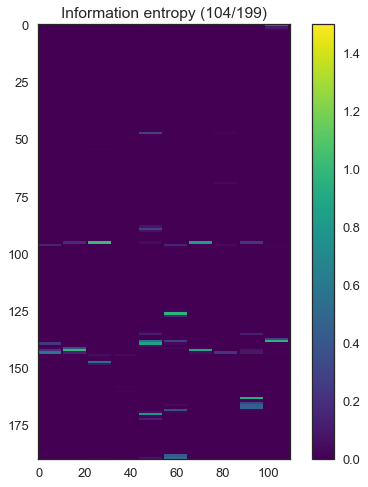

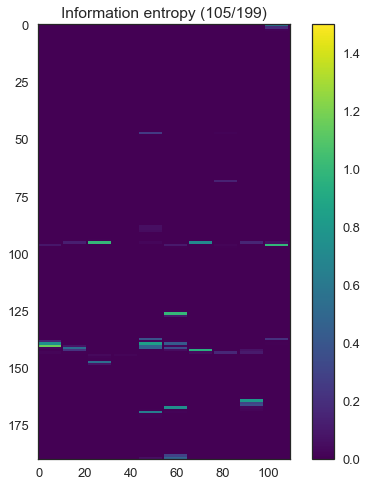

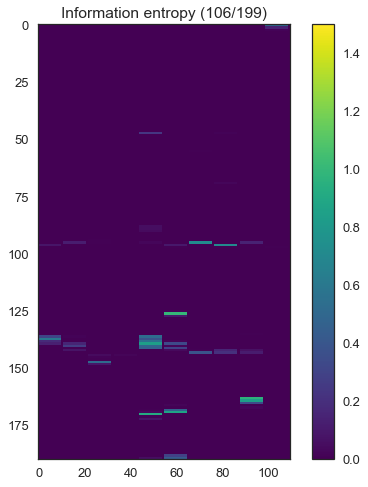

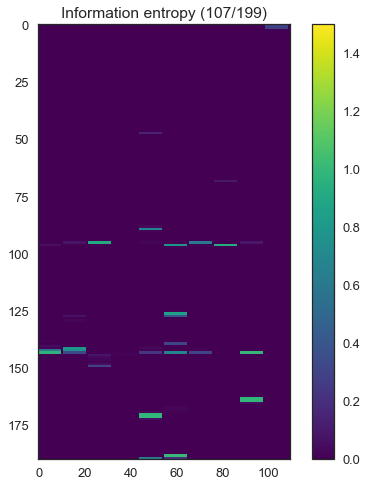

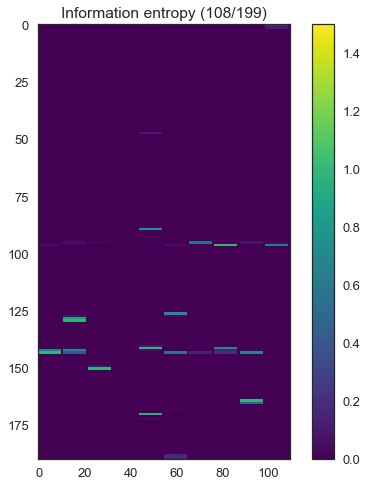

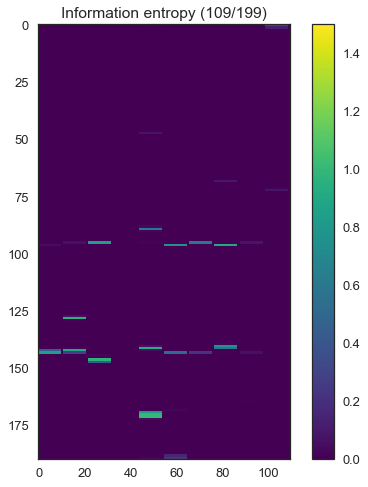

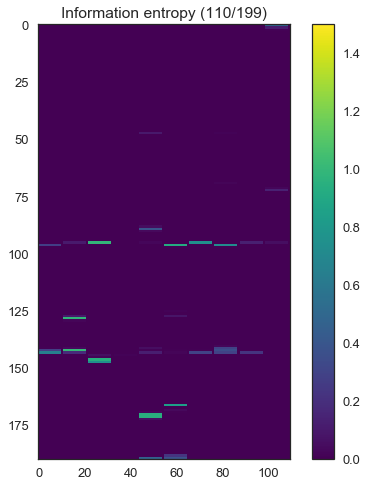

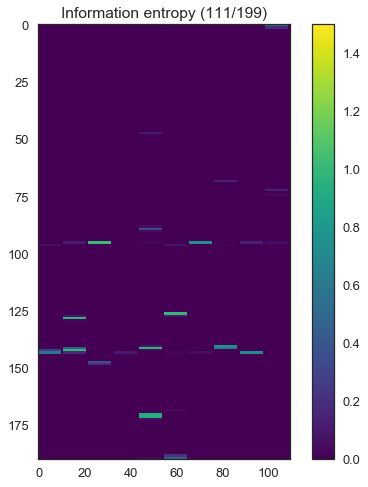

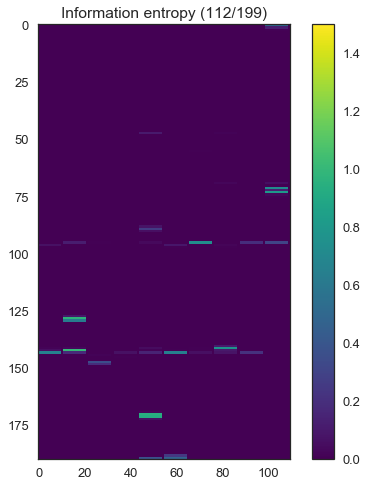

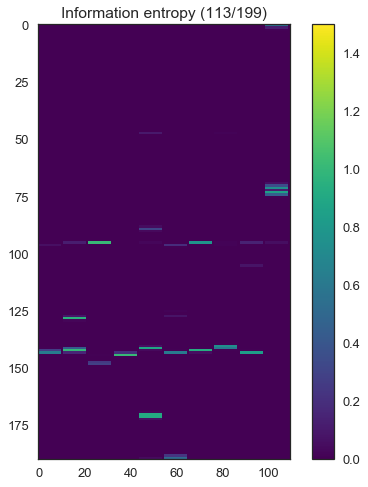

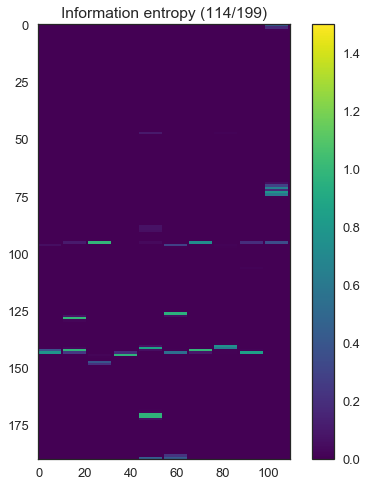

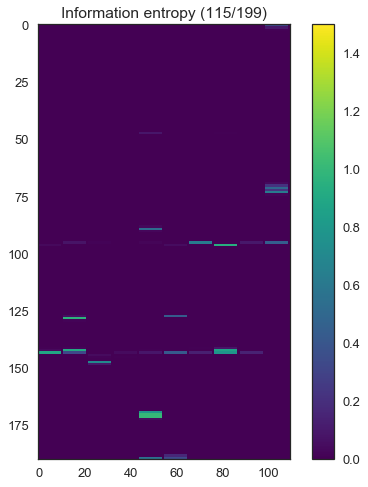

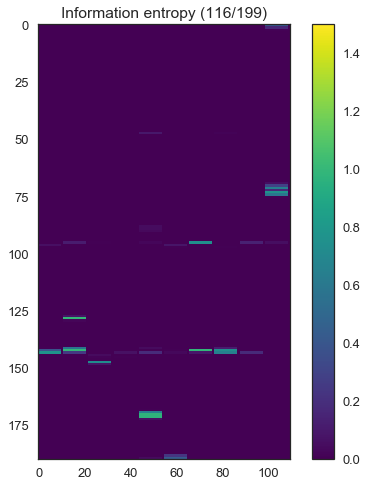

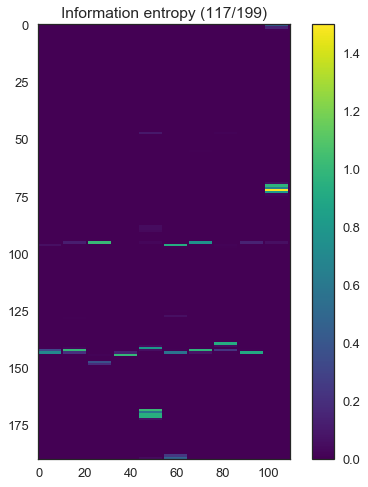

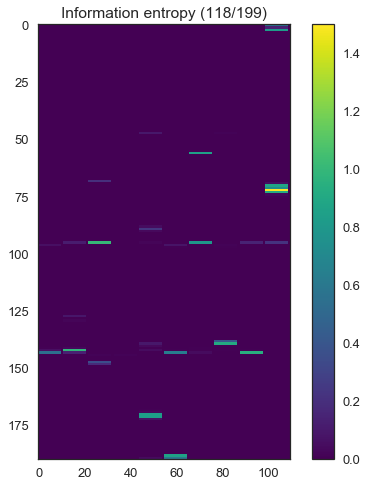

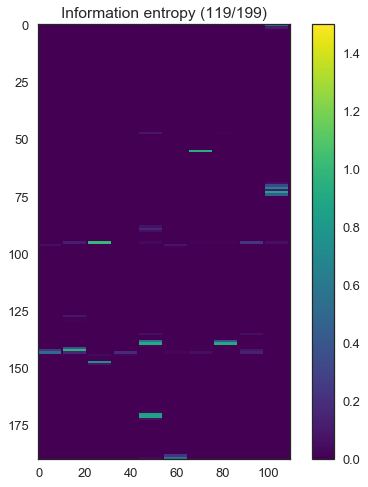

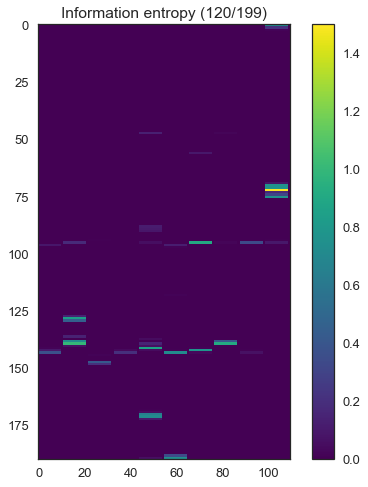

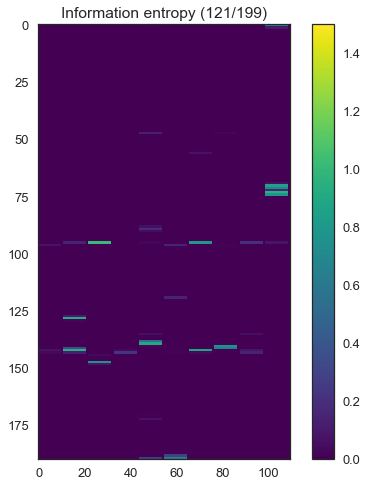

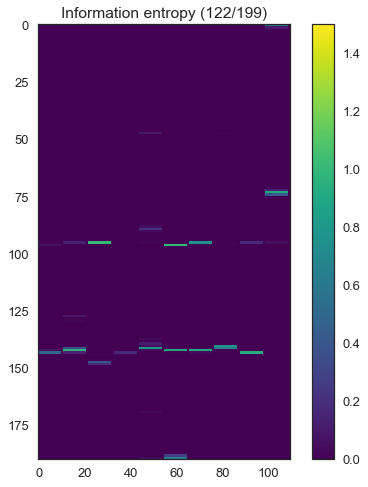

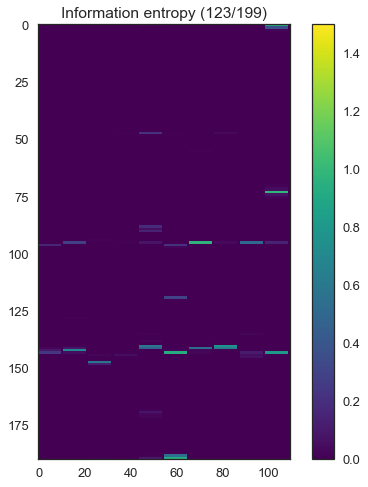

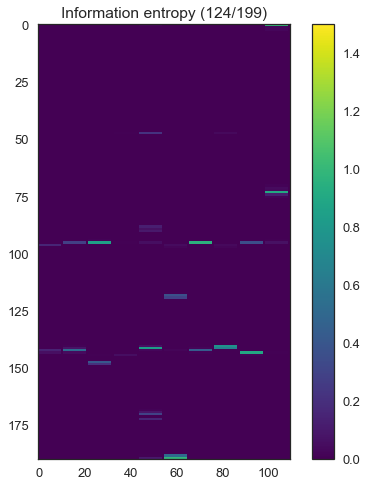

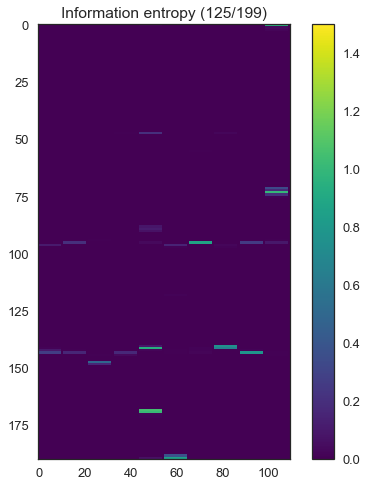

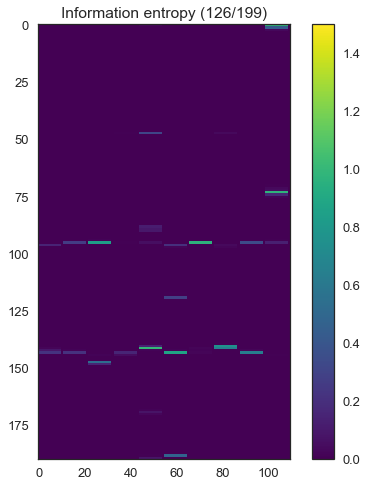

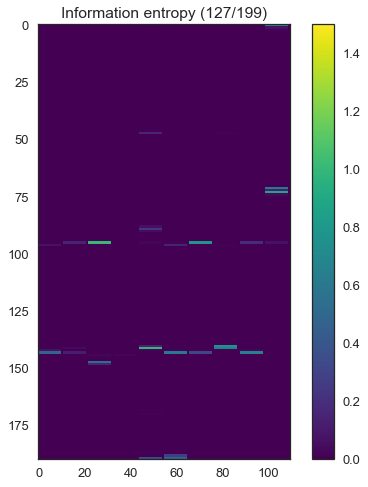

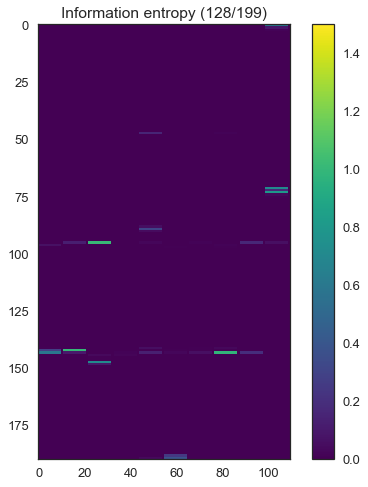

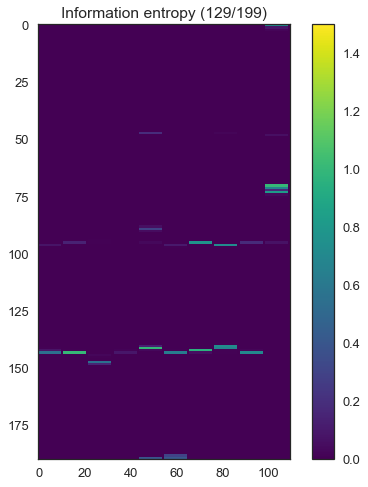

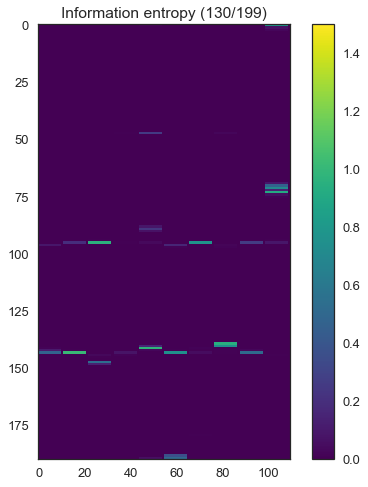

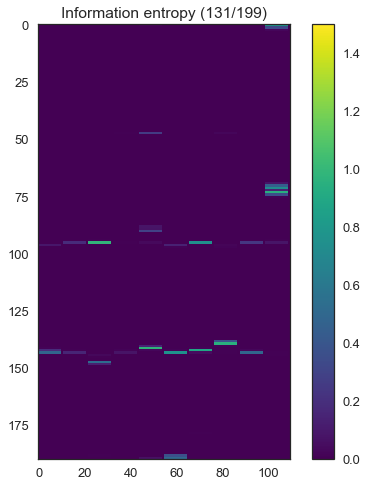

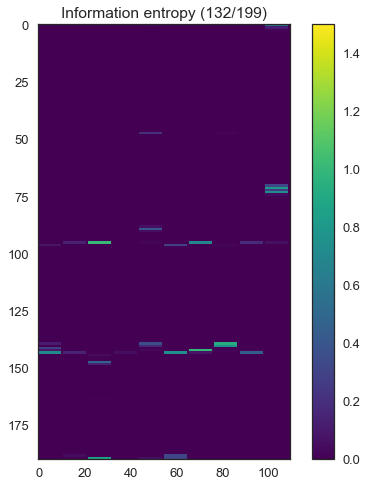

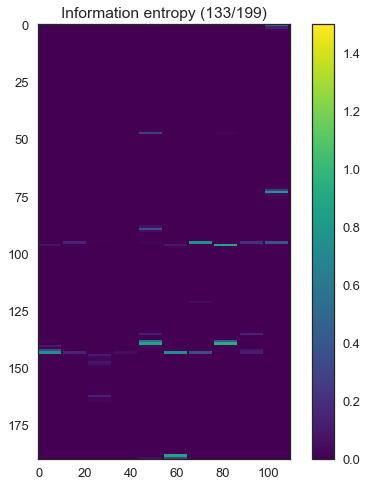

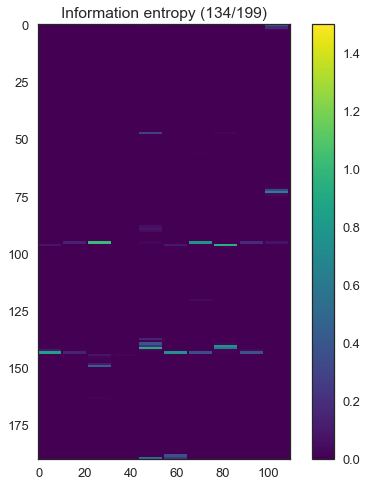

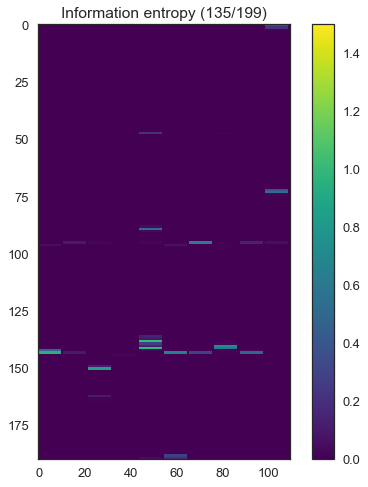

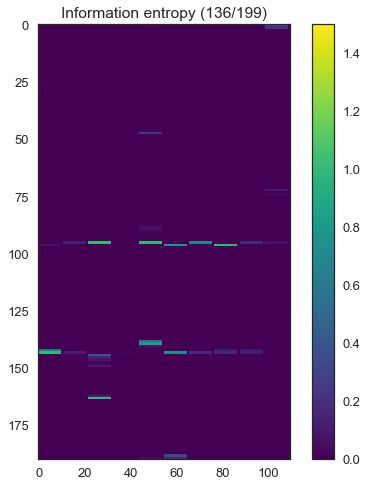

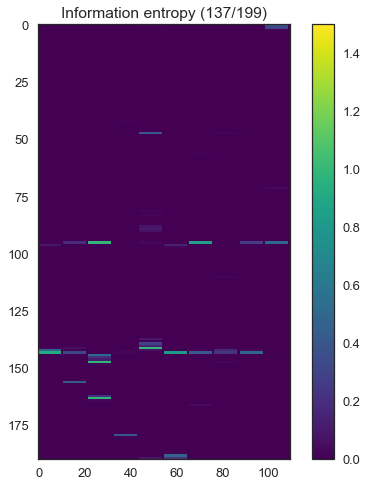

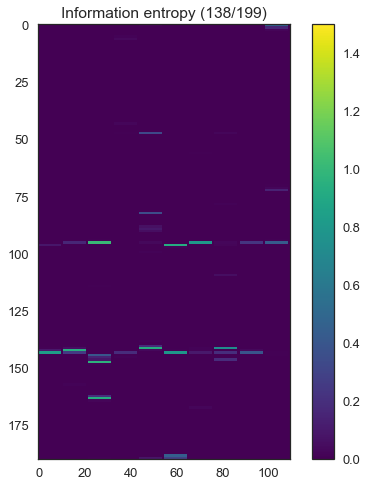

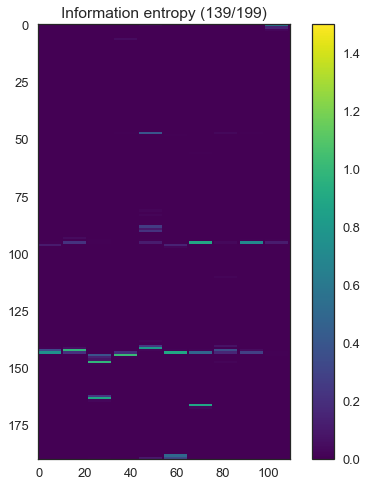

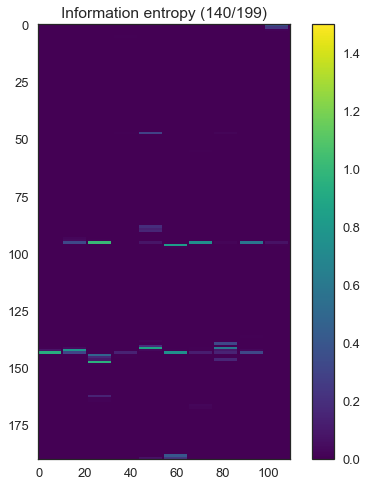

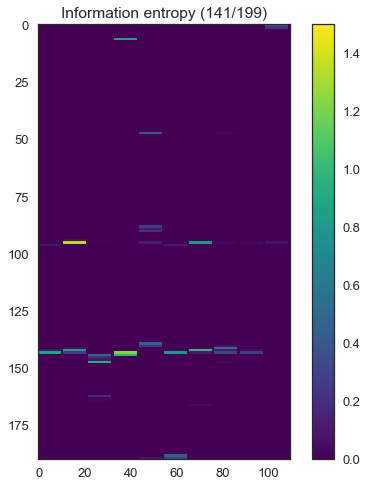

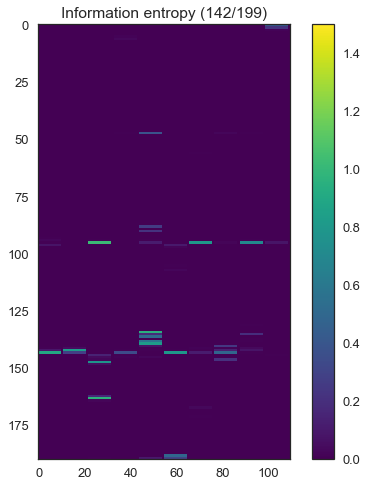

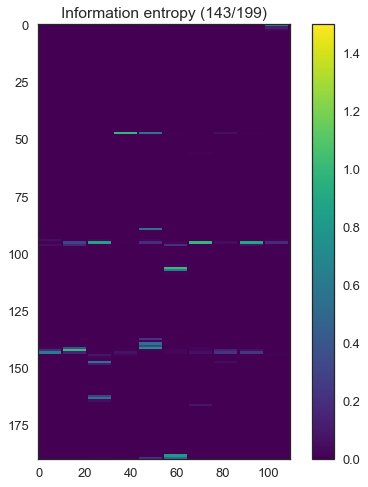

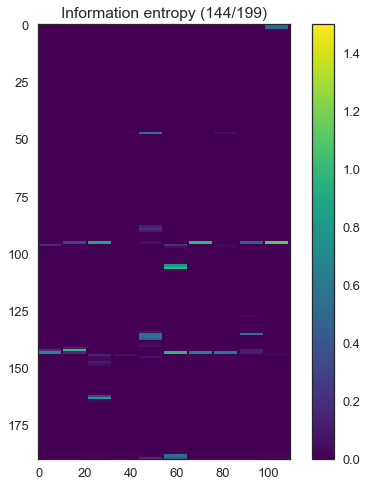

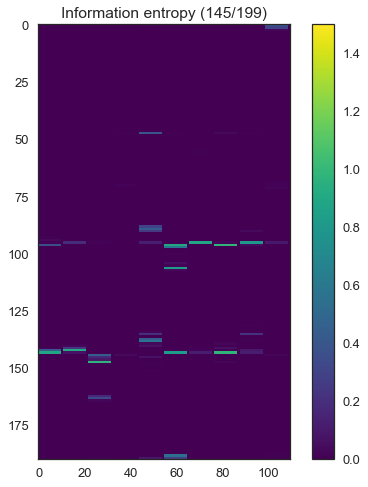

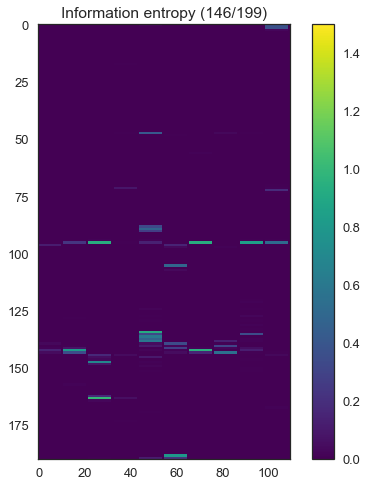

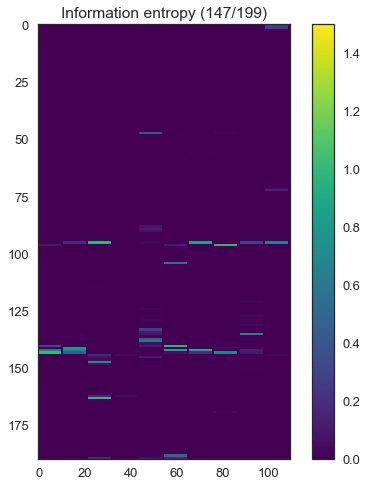

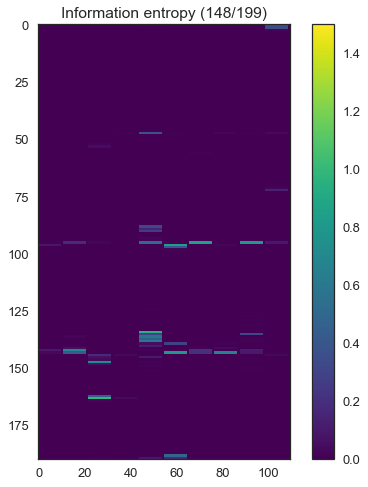

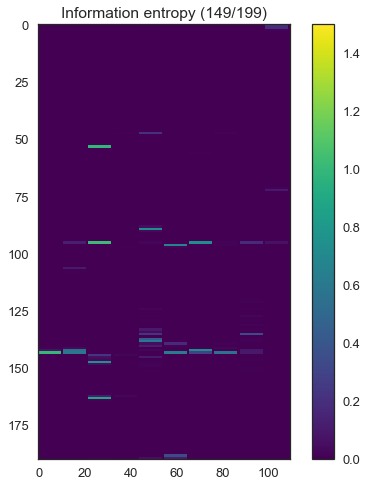

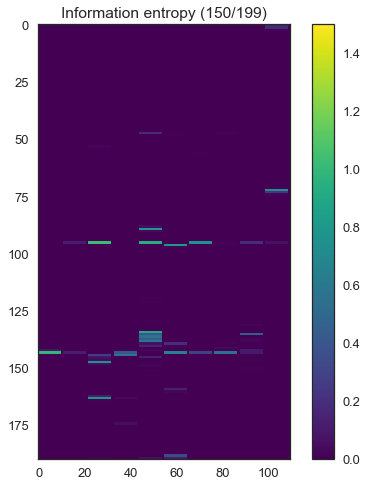

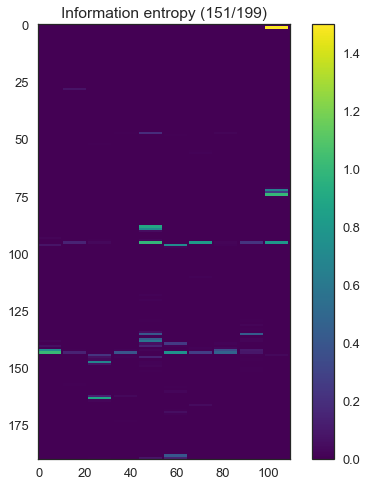

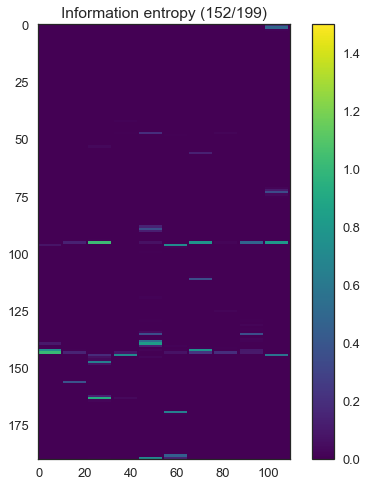

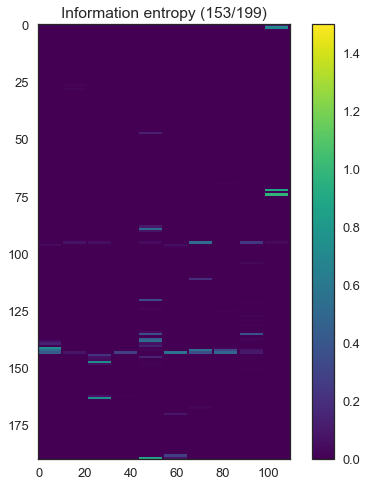

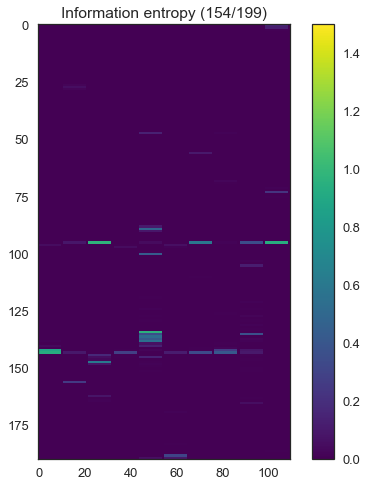

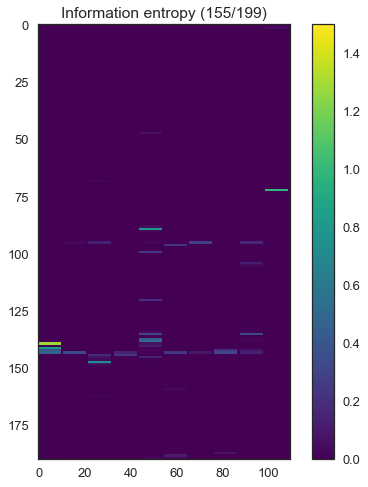

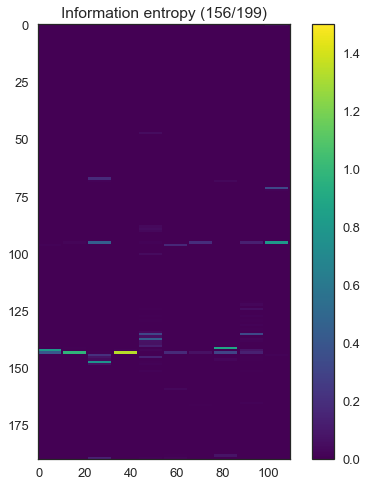

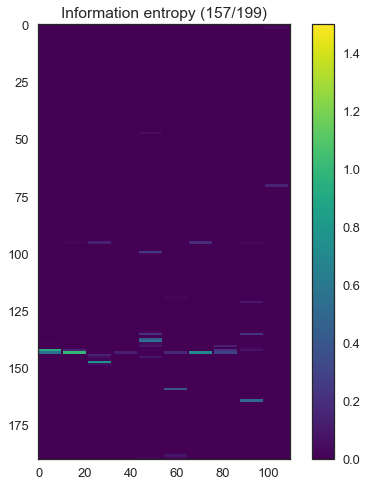

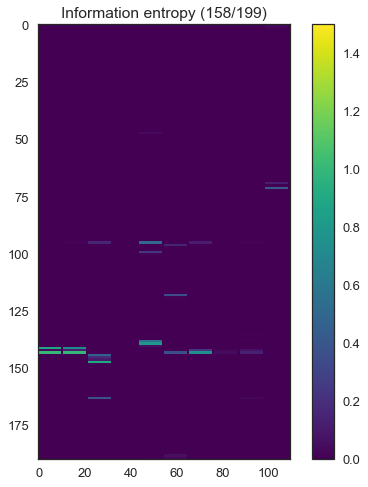

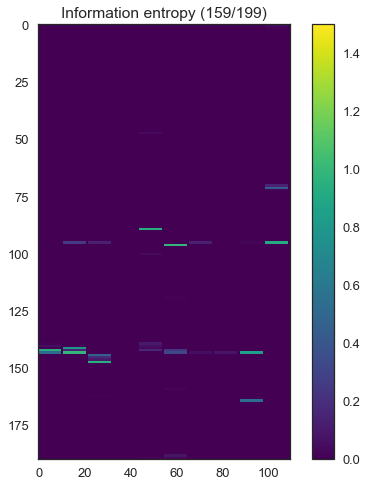

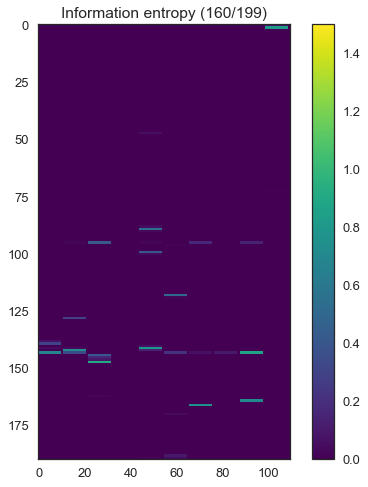

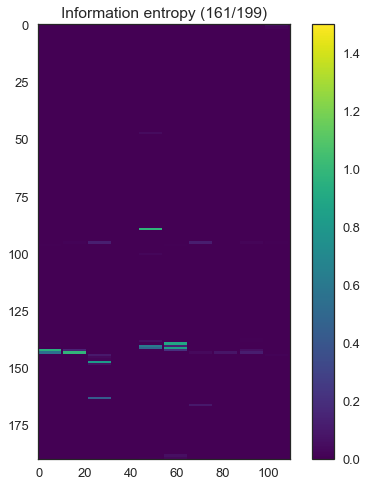

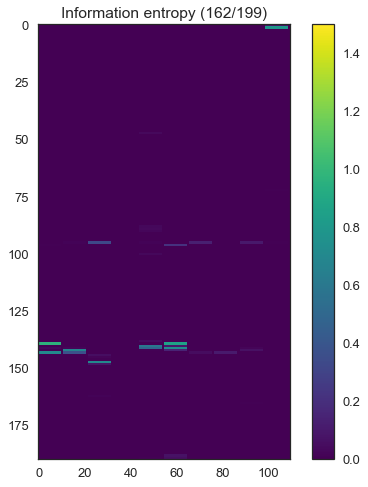

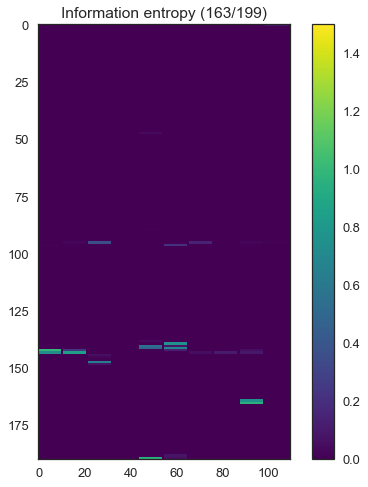

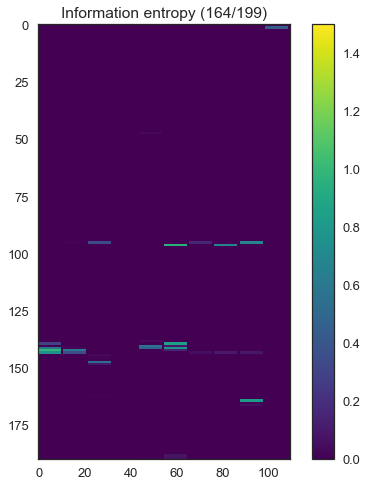

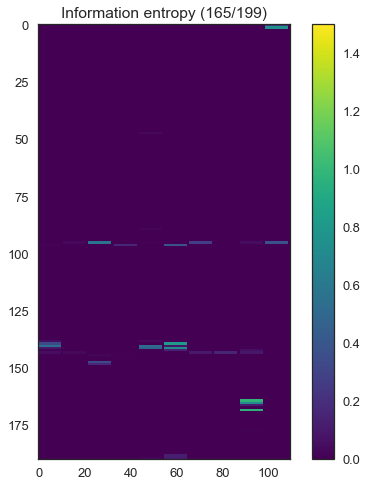

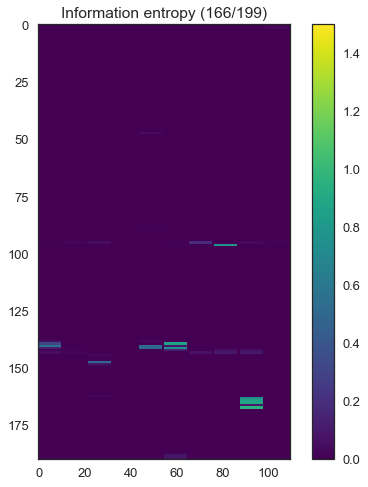

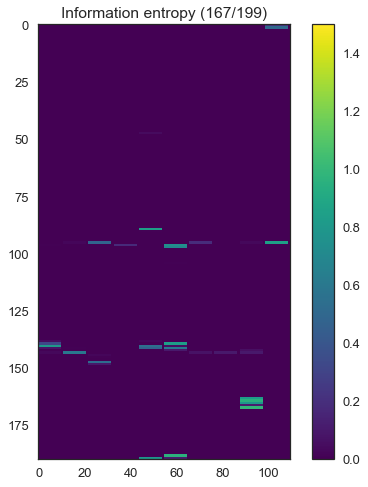

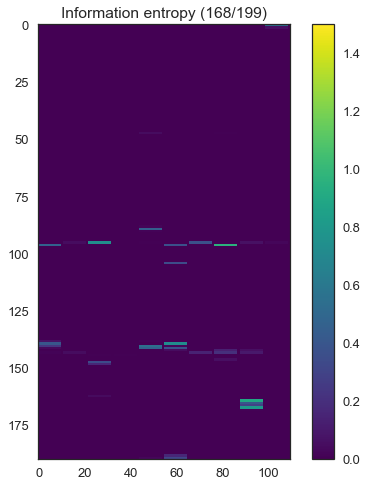

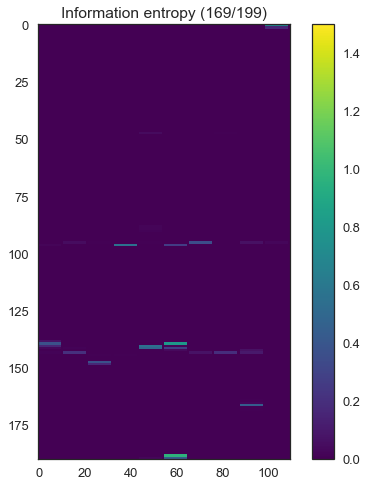

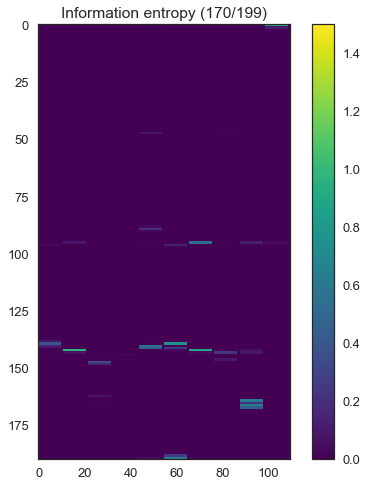

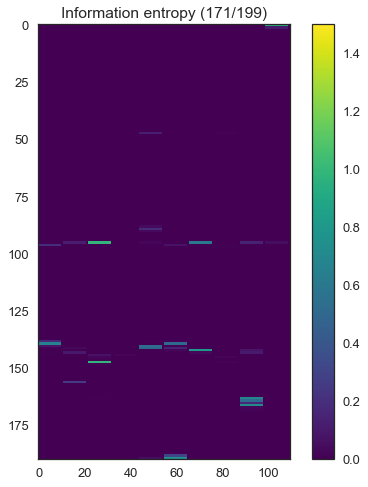

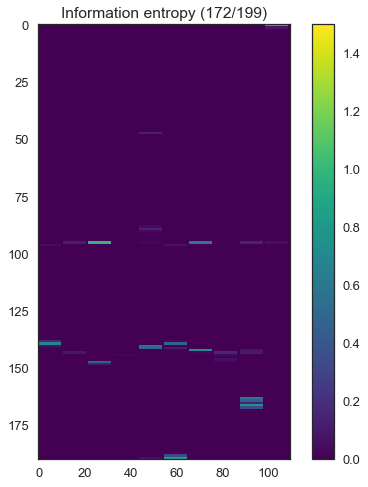

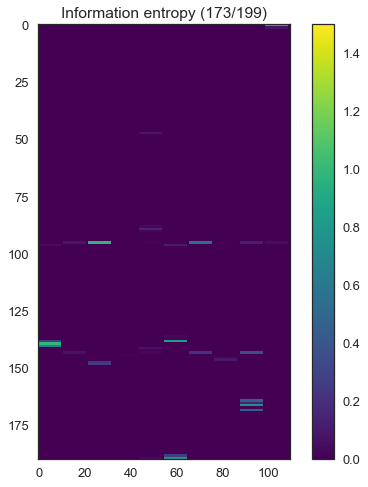

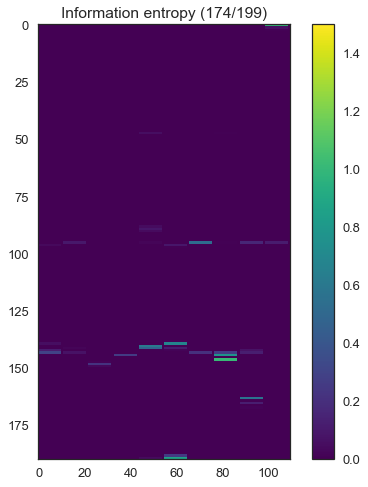

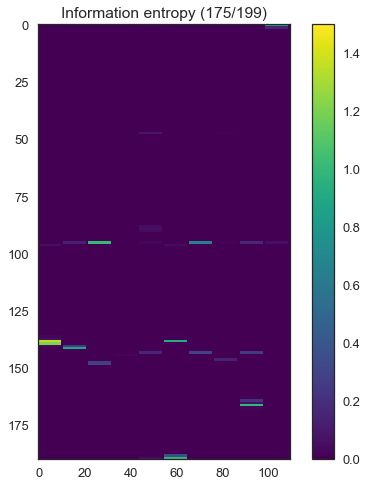

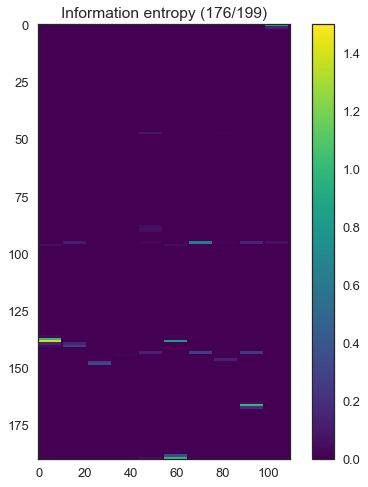

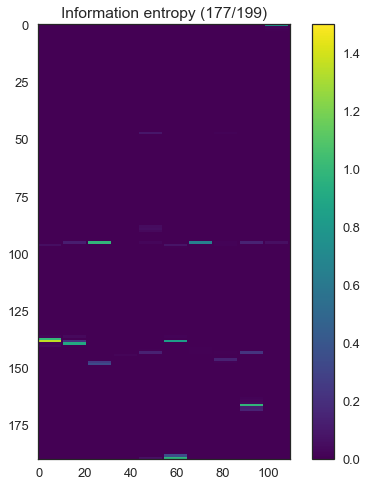

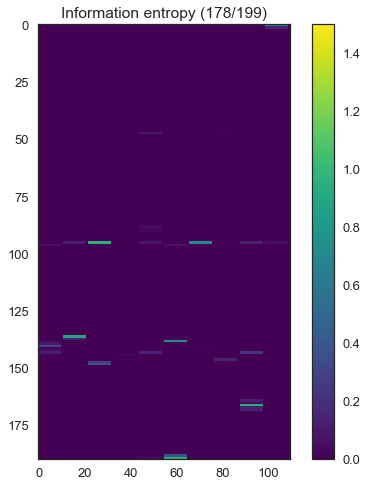

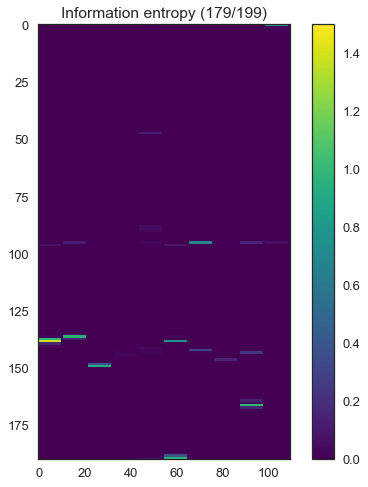

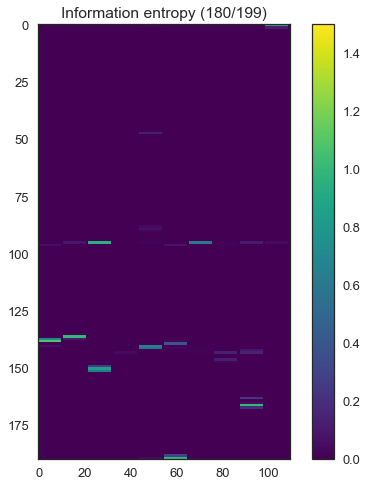

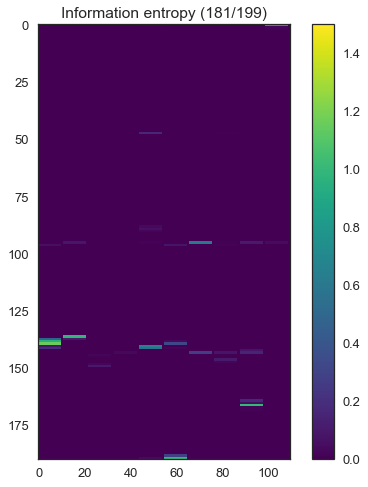

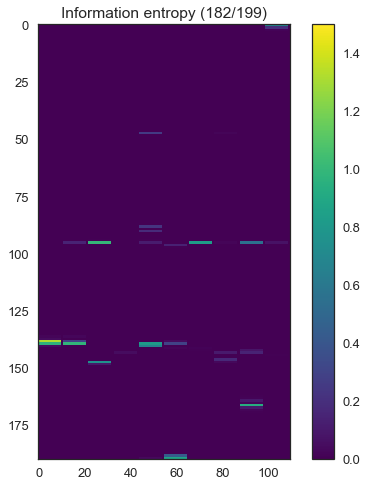

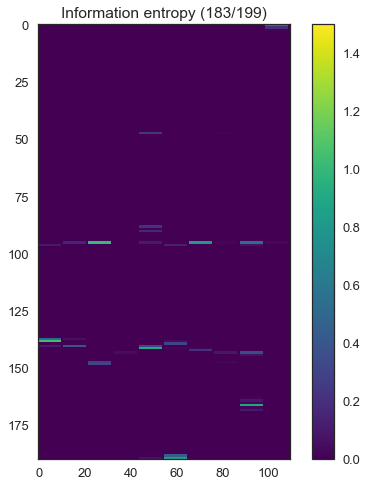

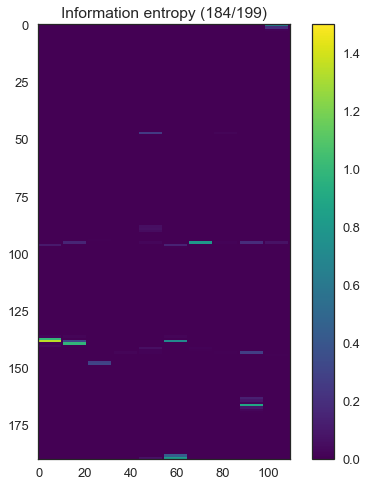

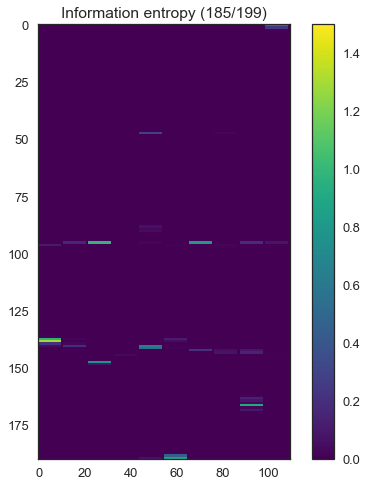

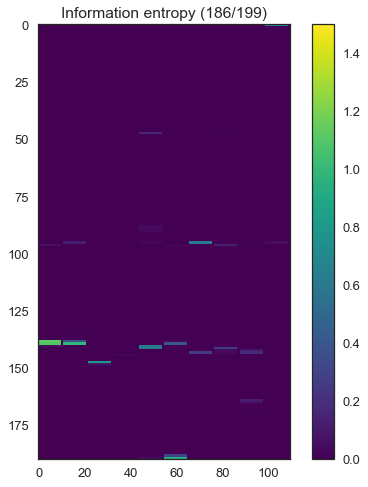

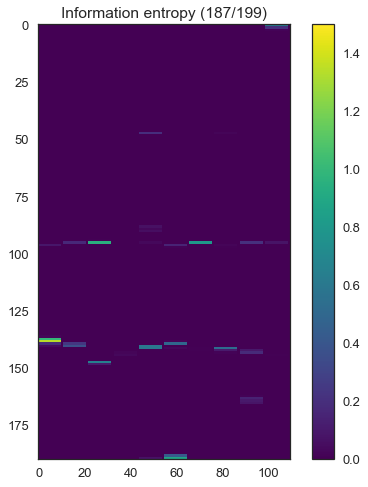

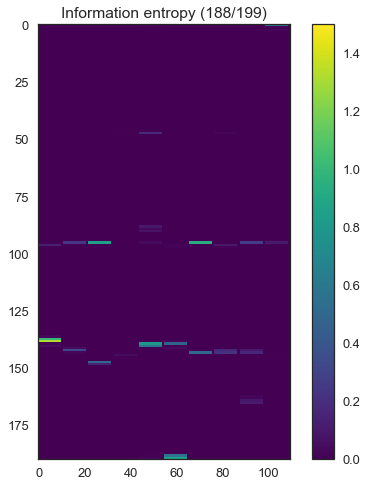

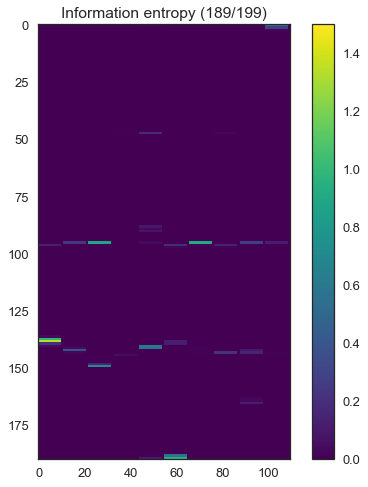

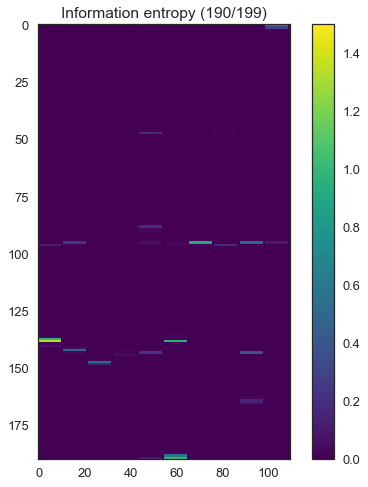

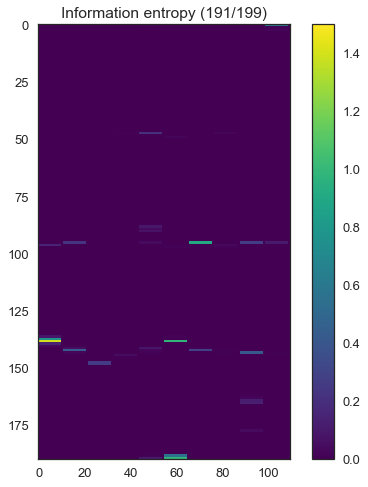

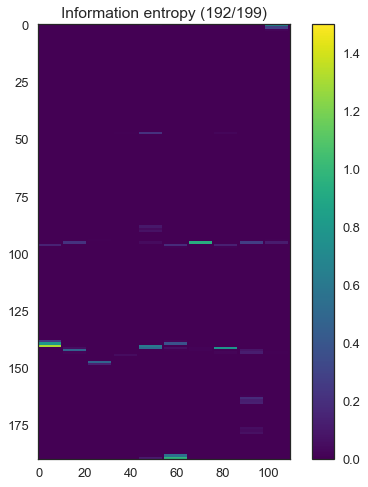

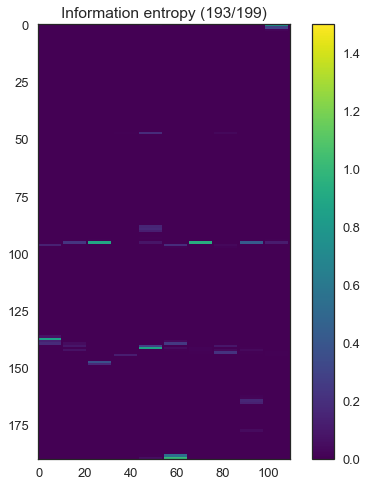

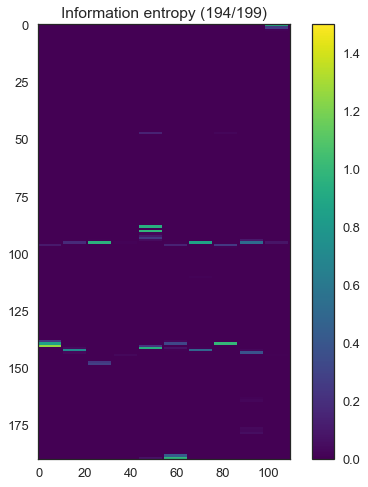

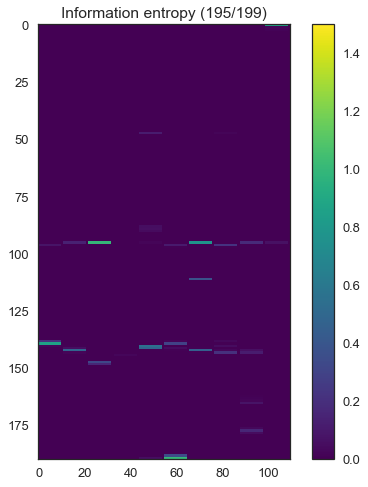

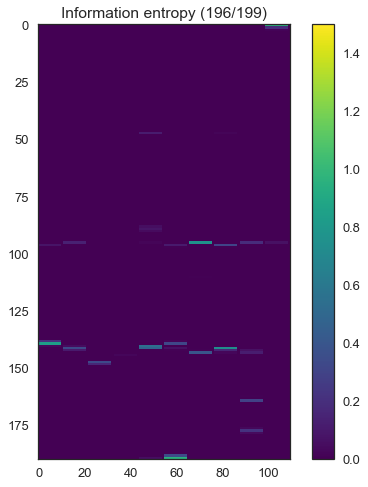

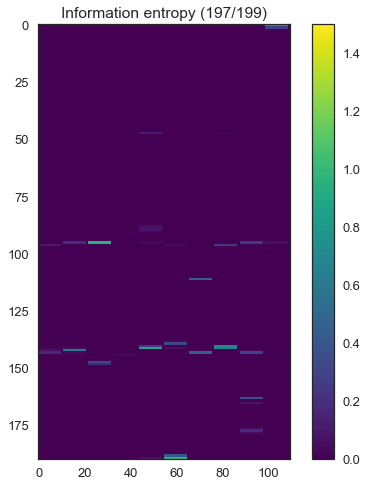

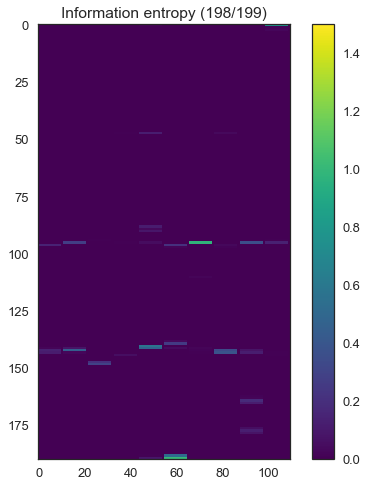

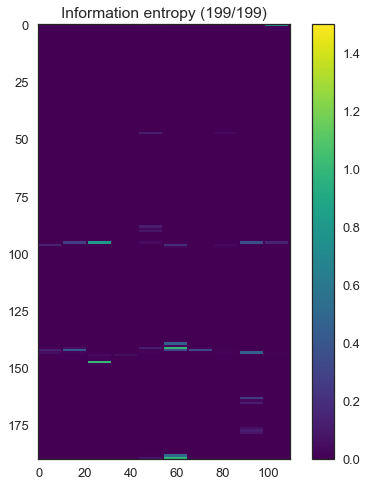

In [45]:
%matplotlib inline
import pylab
for i in range(len(clf.labels)-1):
    imshow = information_entropy(clf.labels_probability[i], data_s3)
    plt.figure(figsize=(8,8))
    plt.imshow(imshow, cmap='viridis')
    plt.grid(False)
    plt.clim(0,1.5)
    plt.colorbar()
    plt.title('Information entropy (%s/199)'%i)
    pylab.savefig('images_gif/test%s.png'%i)

In [46]:
filenames = []
for i in range(len(clf.labels)-1):
    filenames.append('images_gif/test%s.png'%i)

In [47]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('images_gif/movie.gif', images)

<IPython.core.display.Javascript object>


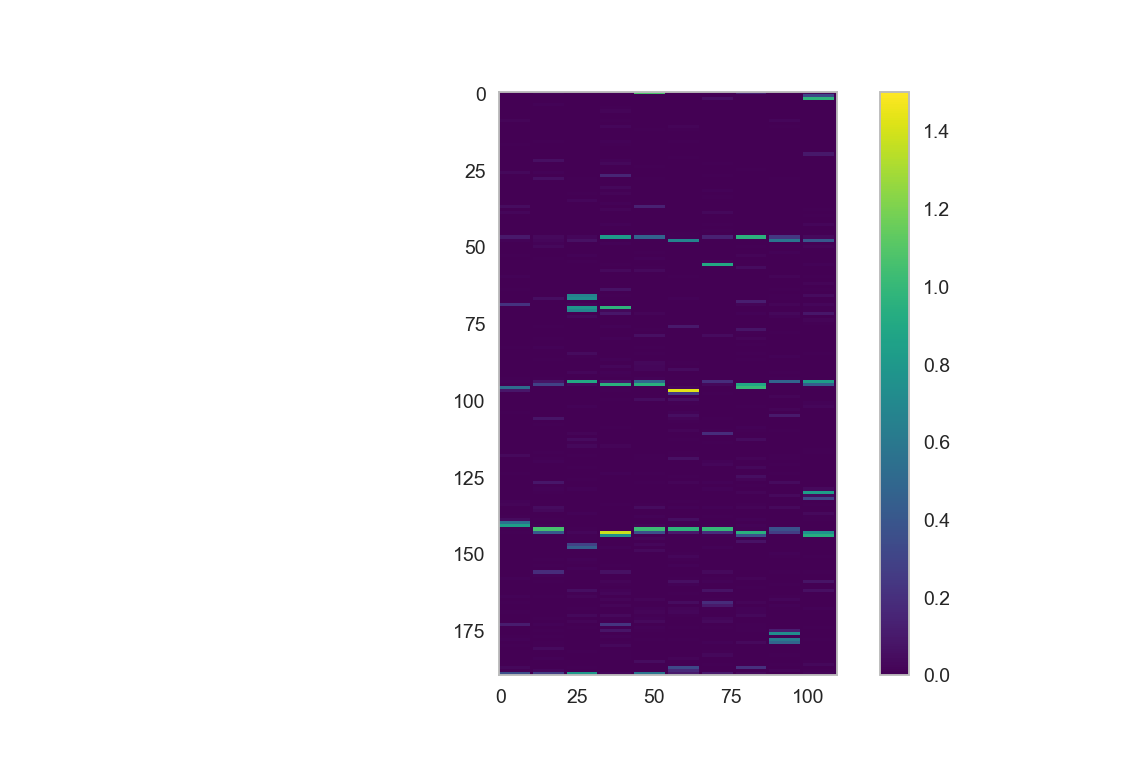

In [10]:
%matplotlib notebook
plt.imshow(imshow, cmap='viridis')
plt.grid(False)
plt.clim(0,1.5)
plt.colorbar()

In [8]:
# compare Gibbs energies calcluated from Gempy model 2D (X,Y) and BaySeg well data 1D (Z)
print('Gibbs energy GemPy   |    Gibbs energy bayseg      |     Likelihood')
print('______________________________________________________________________')
for i in np.arange(0,60):# len(clf.gempy_energy)):
    print(np.around(clf.storage_gempy_e[0][i],2),'   |   ',
          np.around(clf.storage_gibbs_e[0][i],2),'   |   ',
          np.around(clf.storage_like_e[0][i],2))

Gibbs energy GemPy   |    Gibbs energy bayseg      |     Likelihood
______________________________________________________________________
[2.4 2.4 2.4 0. ]    |    [0.6 0.6 0.6 0. ]    |    [ 3.68  6.26  4.22 -1.07]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [ 8.83 12.46  7.63  0.22]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [ 6.61 11.96  5.01  2.29]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [ 4.85 11.44  7.62  0.7 ]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [6.72 7.09 5.92 1.97]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [ 7.35 12.71  7.6   0.15]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [7.03 6.53 4.73 0.87]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [4.7  4.28 1.79 0.88]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [ 4.    4.16  2.34 -0.36]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [3.04 1.   0.28 1.24]
[2.4 2.4 2.4 0. ]    |    [1.2 1.2 1.2 0. ]    |    [11.89 10.5  10.75  2.39]
[2.4 2.4 2.4 0. ]  

In [9]:
# compare coordinates from GemPy grid and coordinates from raw well data (BaySeg)
print('Gempy coordinates        |      Well data coordinates')
print('_____________________________________________________')
for i in range(150):    
    print(clf.index_temp[clf.index_gempy[15+i*6]],'     |     ',clf.coords[15+i*6])

Gempy coordinates        |      Well data coordinates
_____________________________________________________
[ 54.57843   89.95098  -14.960784]      |      [ 54.1   89.5  -16.27]
[ 54.57843   89.95098  -23.509804]      |      [ 54.1   89.5  -22.58]
[ 54.57843   89.95098  -27.784313]      |      [ 54.1   89.5  -28.88]
[ 54.57843   89.95098  -36.333332]      |      [ 54.1   89.5  -35.17]
[ 54.57843  89.95098 -40.60784]      |      [ 54.1   89.5  -41.48]
[ 54.57843   89.95098  -49.156864]      |      [ 54.1   89.5  -47.78]
[ 54.57843   89.95098  -53.431374]      |      [ 54.1   89.5  -54.08]
[ 54.57843   89.95098  -61.980392]      |      [ 54.1   89.5  -60.38]
[ 54.57843   89.95098  -66.254906]      |      [ 54.1   89.5  -66.68]
[ 54.57843   89.95098  -74.803925]      |      [ 54.1   89.5  -72.97]
[ 54.57843  89.95098 -79.07843]      |      [ 54.1   89.5  -79.28]
[ 54.57843  89.95098 -87.62745]      |      [ 54.1   89.5  -85.58]
[ 54.57843  89.95098 -91.90196]      |      [ 54.1   89.5  -9

In [56]:
true_label = data_s3.layer.values.copy()

In [57]:
true_label[0:190]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
true_label[np.where(true_label == 3)] = 11
true_label[np.where(true_label == 0)] = 10
true_label[np.where(true_label == 2)] = 12
true_label[np.where(true_label == 1)] = 13
true_label = true_label -10

In [49]:
labels_without_gempy[-1][0:190]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy = []
for i in range(len(labels_without_gempy)):
    diff_without_gempy.append(len(np.where(labels_without_gempy[i] - true_label != 0)[0]))

In [54]:
diff_without_gempy[-1]

35

In [55]:
labels_without_gempy2[-1][0:190]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [59]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy2 = []
for i in range(len(labels_without_gempy2)):
    diff_without_gempy2.append(len(np.where(labels_without_gempy2[i] - true_label != 0)[0]))

In [60]:
diff_without_gempy2[-1]

39

In [21]:
labels_with_gempy[-1][0:190]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy = []
for i in range(len(labels_with_gempy)):
    diff_with_gempy.append(len(np.where(labels_with_gempy[i] - true_label != 0)[0]))

In [24]:
diff_with_gempy[-2]

45

In [25]:
labels_with_gempy2[-1][0:190]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy2 = []
for i in range(len(labels_with_gempy2)):
    diff_with_gempy2.append(len(np.where(labels_with_gempy2[i] - true_label != 0)[0]))

In [34]:
diff_with_gempy2[-2]

36

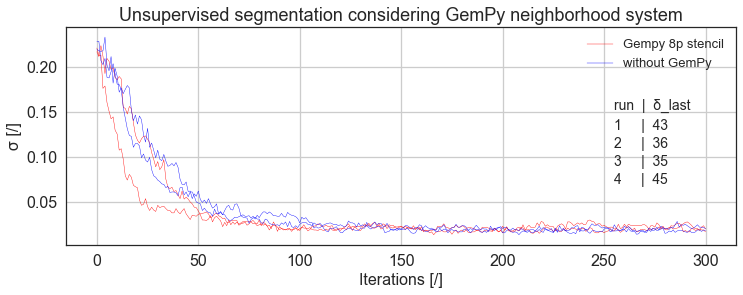

In [108]:
% matplotlib inline
fig = plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size': 34})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

plt.plot(range(0,len(labels_with_gempy)), 
         np.asarray(diff_with_gempy)/len(labels_with_gempy[-1]), 
         'r', linewidth=0.4)
        
plt.plot(range(0,len(labels_with_gempy2)), 
         np.asarray(diff_with_gempy2)/len(labels_with_gempy2[-1]), 
         'r', linewidth=0.4, label = 'Gempy 8p stencil')

plt.plot(range(0,len(labels_without_gempy)), 
         np.asarray(diff_without_gempy)/len(labels_without_gempy[-1]), 
         'b', linewidth=0.4)

plt.plot(range(0,len(labels_without_gempy2)), 
         np.asarray(diff_without_gempy2)/len(labels_without_gempy2[-1]), 
         'b', linewidth=0.4, label = 'without GemPy')

plt.xlabel('Iterations [/]', fontsize = 16)
plt.ylabel('σ [/]', fontsize = 16)
plt.title('Unsupervised segmentation considering GemPy neighborhood system', fontsize = 18)
fig.patch.set_facecolor('white')
plt.grid(True)
plt.text(255, 0.152, 'run  |  δ_last',fontsize = 14)
plt.text(255, 0.130, '1     |  43',fontsize = 14)
plt.text(255, 0.110, '2     |  36',fontsize = 14)
plt.text(255, 0.090, '3     |  35',fontsize = 14)
plt.text(255, 0.070, '4     |  45',fontsize = 14)
plt.legend()

In [14]:
# calculate number of incorrect voxels for each iteration i
diff_gempy3 = []
for i in range(len(gempy3)):
    diff_gempy3.append(len(np.where(gempy3[i] - true_label != 0)[0]))

In [15]:
np.mean(diff_gempy3[-5:])

33.8

In [20]:
# without GemPy
gempy2 = clf.labels

In [21]:
gempy2[-1][:190]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
# calculate number of incorrect voxels for each iteration i
diff_gempy2 = []
for i in range(len(gempy2)):
    diff_gempy2.append(len(np.where(gempy2[i] - true_label != 0)[0]))

In [24]:
np.mean(diff_gempy2[-5:])

43.6

In [29]:
# with 8p stencil
gempy = clf.labels

In [30]:
gempy[-1][:190]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3], dtype=int64)

In [32]:
# calculate number of incorrect voxels for each iteration i
diff_gempy = []
for i in range(len(gempy)):
    diff_gempy.append(len(np.where(gempy[i] - true_label != 0)[0]))

In [33]:
np.mean(diff_gempy[-5:])

51.2

### Convergence with GemPy

### Convergence without GemPy

### Convergence with GemPy

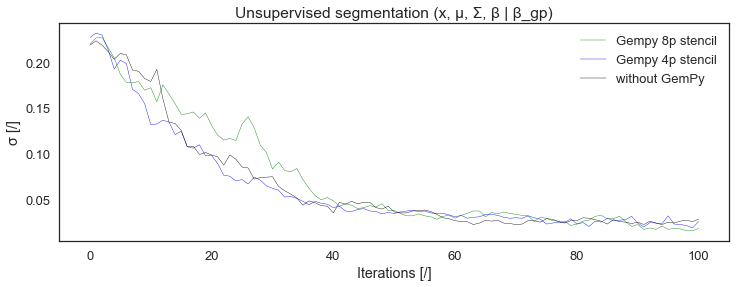

In [38]:
% matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(range(0,len(gempy3)), 
         np.asarray(diff_gempy3)/len(gempy3[-1]), 
         'g', linewidth=0.4, label = 'Gempy 8p stencil')
#plt.plot(range(0,len(gempy3)), 
         #np.ones(len(gempy3))*np.mean(diff_gempy3)/len(gempy3[-1]),
         #'r--',label='mean difference GemPy')

plt.plot(range(0,len(gempy2)), 
         np.asarray(diff_gempy2)/len(gempy2[-1]), 
         'b', linewidth=0.4, label = 'Gempy 4p stencil')
#plt.plot(range(0,len(gempy2)), 
         #np.ones(len(gempy2))*np.mean(diff_gempy2)/len(gempy2[-1]),
         #'y--',label='mean difference GemPy')

plt.plot(range(0,len(gempy)), 
         np.asarray(diff_gempy)/len(gempy[-1]), 
         'k', linewidth=0.4,label = 'without GemPy')
#plt.plot(range(0,len(gempy)), 
         #np.ones(len(gempy))*np.mean(diff_gempy)/len(gempy[-1]),
         #'y--',label='mean difference GemPy')
plt.xlabel('Iterations [/]')
plt.ylabel('σ [/]')
plt.title('Unsupervised segmentation (x, μ, Σ, β | β_gp)')
plt.legend()

In [181]:
diff_gempy3[-1]

43

In [35]:
labels_without_gempy = clf.labels

In [115]:
labels_without_gempy[0][:190]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 2, 0, 2, 1, 2, 2, 3, 3, 3, 0, 0, 2, 0, 3, 3, 3,
       0, 3, 3, 3, 2, 2, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 1, 0, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 2, 0], dtype=int64)

In [130]:
labels_without_gempy2 = clf.labels

In [131]:
labels_without_gempy2[0][:190]

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 2, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2,
       3, 2, 1, 1, 2, 2, 3, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 2, 3, 3, 2,
       0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 2, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 1, 2, 2, 1, 0, 3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3], dtype=int64)

In [42]:
labels_with_gempy = clf.labels

In [116]:
labels_with_gempy[0][:190]

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 2, 3, 2, 1, 2, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0,
       3, 0, 0, 0, 2, 2, 3, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2,
       1, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 3], dtype=int64)

In [113]:
labels_with_gempy2 = clf.labels

In [117]:
labels_with_gempy2[0][:190]

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 1, 3, 1, 2, 1, 1, 0, 3, 0, 3, 3, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 3, 1,
       2, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 3,
       1, 0, 3, 3, 3, 3, 1, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 1], dtype=int64)

In [106]:
np.savetxt('labels_with_gempy2.csv', labels_with_gempy, delimiter=',')

In [109]:
a = np.loadtxt('labels_with_gempy2.csv', dtype = 'str')

In [93]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy = []
for i in range(len(labels_without_gempy)):
    diff_without_gempy.append(len(np.where(labels_without_gempy[i] - true_label != 0)[0]))

In [135]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy2 = []
for i in range(len(labels_without_gempy2)):
    diff_without_gempy2.append(len(np.where(labels_without_gempy2[i] - true_label != 0)[0]))

In [125]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy = []
for i in range(len(labels_with_gempy)):
    diff_with_gempy.append(len(np.where(labels_with_gempy[i] - true_label != 0)[0]))

In [121]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy2 = []
for i in range(len(labels_with_gempy2)):
    diff_with_gempy2.append(len(np.where(labels_with_gempy2[i] - true_label != 0)[0]))

501

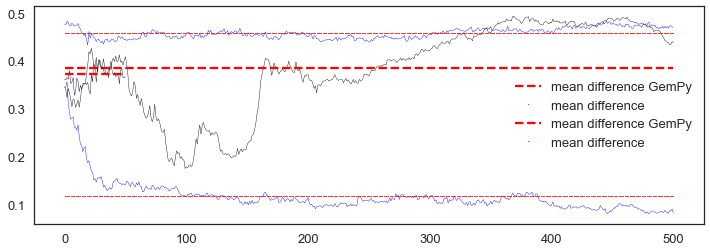

In [136]:
% matplotlib inline
plt.figure(figsize=(12,4))
plt.plot(range(0,len(labels_with_gempy)), 
         np.asarray(diff_with_gempy)/len(labels_with_gempy[-1]), 
         'k', linewidth=0.4)
plt.plot(range(0,len(labels_with_gempy)), 
         np.ones(len(labels_with_gempy))*np.mean(diff_with_gempy)/len(labels_with_gempy[-1]),
         'r--',label='mean difference GemPy')
plt.plot(range(0,len(labels_without_gempy)), 
         np.asarray(diff_without_gempy)/len(labels_without_gempy[-1]), 
         'b', linewidth=0.4)
plt.plot(range(0,len(labels_without_gempy)), 
         np.ones(len(labels_without_gempy))*np.mean(diff_without_gempy)/len(labels_without_gempy[-1]),
         'r.',label='mean difference',markersize = 2)
plt.plot(range(0,len(labels_with_gempy2)), 
         np.asarray(diff_with_gempy2)/len(labels_with_gempy2[-1]), 
         'k', linewidth=0.4)
plt.plot(range(0,len(labels_with_gempy2)), 
         np.ones(len(labels_with_gempy2))*np.mean(diff_with_gempy2)/len(labels_with_gempy2[-1]),
         'r--',label='mean difference GemPy')
plt.plot(range(0,len(labels_without_gempy2)), 
         np.asarray(diff_without_gempy2)/len(labels_without_gempy2[-1]), 
         'b', linewidth=0.4)
plt.plot(range(0,len(labels_without_gempy2)), 
         np.ones(len(labels_without_gempy2))*np.mean(diff_without_gempy2)/len(labels_without_gempy2[-1]),
         'r.',label='mean difference',markersize = 2)

plt.legend()

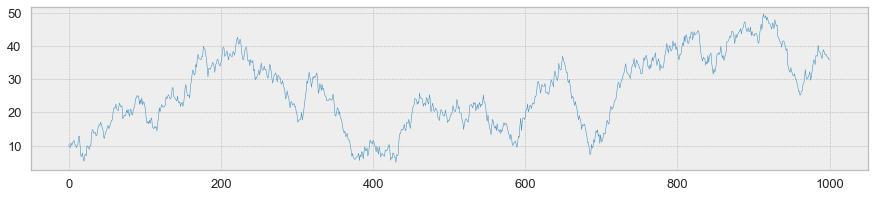

In [47]:
plt.figure(figsize=(15,3))
plt.plot(np.arange(1001), clf.betas[300:], linewidth = 0.5)

In [414]:
# 25 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.115
Diff: 0.065


In [328]:
# 10 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.027
Diff: 0.012


In [376]:
# 4 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.055
Diff: 0.028


In [442]:
# 1 borehole (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.235
Diff: 0.237


In [2]:
mean_4 = [0.128, 0.060, 0.018, 0.037]
diff_4 = [0.116, 0.042, 0.013, 0.014]
mean_5_5 = [0.235, 0.055, 0.027, 0.075]
diff_5_5 = [0.237, 0.028, 0.012, 0.035]
n_boreholes = [1, 2, 3, 4]

In [126]:
interfaces = clf.geo_data.interfaces.copy()

In [127]:
interfaces_single = interfaces[3:8].drop_duplicates(subset='borehole').reset_index(drop = True)

In [128]:
interfaces_single = interfaces_single.drop(index = np.where(interfaces_single.formation == 'basement')[0])

In [129]:
def euclideanDistance(coordinate1, coordinate2):
    return pow(pow(coordinate1[0] - coordinate2[0], 2) + pow(coordinate1[1] - coordinate2[1], 2), .5)

In [130]:
def find_midpoint(point1_x, point1_y, point2_x, point2_y):
    X = (point1_x + point2_x)/2
    Y = (point1_y + point2_y)/2
    return [X,Y]

In [131]:
points = []
for k in range(len(interfaces_single)):
    points.append([interfaces_single.loc[k, 'X'], interfaces_single.loc[k, 'Y'], 
                   interfaces_single.loc[k,'borehole']])

In [89]:
points[0][-1]

'BH1'

In [132]:
distances = []
nbh_dis = []
nbh = []
midpoints = []

for j in range(len(points)):
    distances += [[euclideanDistance(points[j], points[i]) for i in range(len(points))]] # stores distances between two points
    nbh_dis.append(hq.nsmallest(5, distances[j])[1:])
    nbh.append([np.where(distances[j] == nbh_dis[j][k])[0][0] for k in range(len(nbh_dis[j]))])
    midpoints.append([find_midpoint(interfaces_single.X.loc[j], interfaces_single.Y.loc[j], 
                                   interfaces_single.X.loc[nbh[j][i]], 
                                    interfaces_single.Y.loc[nbh[j][i]]) for i in range(4)])
    midpoints[j].append(points[j][-1])

In [115]:
midpoints[2][0][0]

96.69999999999999

In [104]:
color = ['red','green','yellow','blue','black']

In [157]:
marker = ['s','>','^','<','v']

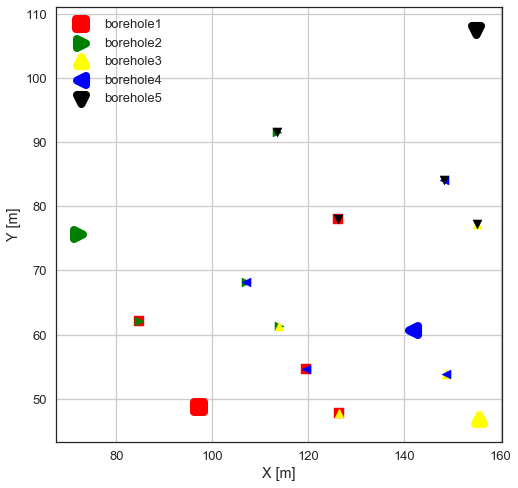

In [165]:
plt.figure(figsize=(8,8))

for j in range(5):
    plt.scatter(interfaces_single.X[j], interfaces_single.Y[j], 
                marker=marker[j], color = color[j], linewidth = 8, label = 'borehole%s'%(j+1))
    for i in range(4):   
        plt.scatter(midpoints[j][i][0], midpoints[j][i][1],color=color[j], marker=marker[j])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.legend()


In [60]:
interfaces_single

,X,Y,Z,borehole,formation,formation_number,isFault,order_series,series,annotations,formation_value
0,54.1,89.5,-49.88,BH1,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,73.9,111.1,-49.88,BH2,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,96.1,49.9,-48.82,BH5,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,97.3,48.7,-49.88,BH9,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,72.1,75.7,-49.88,BH10,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
5,155.5,46.9,-49.88,BH3,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},5}$",1
6,141.7,60.7,-49.88,BH6,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},6}$",1
7,154.9,107.5,-49.88,BH7,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},7}$",1
8,67.3,52.9,-49.88,BH8,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},8}$",1
9,51.7,49.3,-49.88,BH4,Layer 1,1,False,1,Strat_Series,"${\bf{x}}_{\alpha \,{\bf{1}},9}$",1
